# Neural Network-Based Classification Project: Bank Churn Prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer.
* Surname: Last name of the customer.
* CreditScore: It defines the credit history of the customer.
* Geography: A customer’s location.
* Gender: It defines the gender of the customer.
* Age: Age of the customer.
* Tenure: Number of years for which the customer has been with the bank.
* NumOfProducts: Refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance.
* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.
* EstimatedSalary: Estimated salary.
* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not (active member in the sense, using bank products regularly, making transactions etc).
* Exited: Whether or not the customer left the bank within six month. It can take two values:
  * 0 = No (customer did not leave the bank)
  * 1 = Yes (customer left the bank)

## Install additional libraries

In [ ]:
# Install libraries for tensorflow
!pip install tensorflow

## Importing necessary libraries

In [ ]:
# Import libraries for data manipulation
import re
import random
import numpy as np
import pandas as pd

# Import libraries for error handling
import warnings

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for statistics
from scipy.stats import *

# Import libraries for scikit-learn
import sklearn as skl
from sklearn.tree import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *

# Import libraries for sampling
import imblearn as imb
from imblearn.over_sampling import *
from imblearn.under_sampling import *

# Import libraries for tensorflow
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.backend import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *

In [ ]:
# Apply settings

# Ignore warnings
warnings.filterwarnings('ignore')

# Set limit for the displayed columns in a DataFrame
pd.set_option('display.max_columns', 50)

# Set precision of floating numbers to 5 decimal points
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Set fixed seed for random number generators
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

## Loading the dataset

In [ ]:
# Read the file
df = pd.read_csv('/content/bank-1.csv')

## Data Overview

In [ ]:
# Display the rows and shape of the DataFrame
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure      Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2      0.00000              1          1               1   
1          1  83807.86000              1          0               1   
2          8 159660.80000              3          1               0   
3          1      0.00000              2          0               0   
4          2 125510.82000              1          1               1   
...      ...          ...            ...        ...             ...   
9995       5      0.00000              2          1               0   
9996      10  57369.61000              1          1               1   
9997       7      0.00000              1          0               1   
9998       3  75075.31000              2          1               0   
9999       4 130142.79000              1          1               0   

      EstimatedSalary  Exited  
0        101348.88000       1  
1        112542.58000       0  
2        113931.57000       1  
3         93826.63000       0  
4         79084.10000       0  
...               ...     ...  
9995      96270.64000       0  
9996     101699.77000       0  
9997      42085.58000       1  
9998      92888.52000       1  
9999      38190.78000       0  

[10000 rows x 14 columns]

In [ ]:
# Display the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Display how many missing values are present in the dataset
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Display how many duplicate records are present in the dataset
df.duplicated().sum()

0

In [ ]:
# Display how many duplicate customerIds are present in the dataset
df[df['RowNumber'].duplicated() == True]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [ ]:
# Display how many duplicate customerIds are present in the dataset
df[df['CustomerId'].duplicated() == True]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [ ]:
# Display unique values in the dataset
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Display the statistical summary of all columns
df.describe(include = 'all').transpose()

count unique     top  freq           mean         std  \
RowNumber       10000.00000    NaN     NaN   NaN     5000.50000  2886.89568   
CustomerId      10000.00000    NaN     NaN   NaN 15690940.56940 71936.18612   
Surname               10000   2932   Smith    32            NaN         NaN   
CreditScore     10000.00000    NaN     NaN   NaN      650.52880    96.65330   
Geography             10000      3  France  5014            NaN         NaN   
Gender                10000      2    Male  5457            NaN         NaN   
Age             10000.00000    NaN     NaN   NaN       38.92180    10.48781   
Tenure          10000.00000    NaN     NaN   NaN        5.01280     2.89217   
Balance         10000.00000    NaN     NaN   NaN    76485.88929 62397.40520   
NumOfProducts   10000.00000    NaN     NaN   NaN        1.53020     0.58165   
HasCrCard       10000.00000    NaN     NaN   NaN        0.70550     0.45584   
IsActiveMember  10000.00000    NaN     NaN   NaN        0.51510     0.49980   
EstimatedSalary 10000.00000    NaN     NaN   NaN   100090.23988 57510.49282   
Exited          10000.00000    NaN     NaN   NaN        0.20370     0.40277   

                           min            25%            50%            75%  \
RowNumber              1.00000     2500.75000     5000.50000     7500.25000   
CustomerId      15565701.00000 15628528.25000 15690738.00000 15753233.75000   
Surname                    NaN            NaN            NaN            NaN   
CreditScore          350.00000      584.00000      652.00000      718.00000   
Geography                  NaN            NaN            NaN            NaN   
Gender                     NaN            NaN            NaN            NaN   
Age                   18.00000       32.00000       37.00000       44.00000   
Tenure                 0.00000        3.00000        5.00000        7.00000   
Balance                0.00000        0.00000    97198.54000   127644.24000   
NumOfProducts          1.00000        1.00000        1.00000        2.00000   
HasCrCard              0.00000        0.00000        1.00000        1.00000   
IsActiveMember         0.00000        0.00000        1.00000        1.00000   
EstimatedSalary       11.58000    51002.11000   100193.91500   149388.24750   
Exited                 0.00000        0.00000        0.00000        0.00000   

                           max  
RowNumber          10000.00000  
CustomerId      15815690.00000  
Surname                    NaN  
CreditScore          850.00000  
Geography                  NaN  
Gender                     NaN  
Age                   92.00000  
Tenure                10.00000  
Balance           250898.09000  
NumOfProducts          4.00000  
HasCrCard              1.00000  
IsActiveMember         1.00000  
EstimatedSalary   199992.48000  
Exited                 1.00000

In [ ]:
# Create a list of variables that will group all categorical columns and numerical columns
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
# Display the count of unique categorical values in each column
for cat_col in cat_cols:
  print(df[cat_col].value_counts(dropna = False))
  print('-' * 50)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
--------------------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------------------------------------
1    7055
0    2945
Name: HasCrCard, dtype: int64
--------------------------------------------------
1    5151
0    4849
Name: IsActiveMember, dtype: int64
--------------------------------------------------
0    7963
1    2037
Name: Exited, dtype: int64
--------------------------------------------------


In [ ]:
# Display the percentage of unique categorical values in each column
for cat_col in cat_cols:
  print(df[cat_col].value_counts(normalize = True, dropna = False).mul(100))
  print('-' * 50)

France    50.14000
Germany   25.09000
Spain     24.77000
Name: Geography, dtype: float64
--------------------------------------------------
Male     54.57000
Female   45.43000
Name: Gender, dtype: float64
--------------------------------------------------
1   70.55000
0   29.45000
Name: HasCrCard, dtype: float64
--------------------------------------------------
1   51.51000
0   48.49000
Name: IsActiveMember, dtype: float64
--------------------------------------------------
0   79.63000
1   20.37000
Name: Exited, dtype: float64
--------------------------------------------------


**Observations:**
* The dataset contains 10,000 rows with 14 columns.
* The size of the DataFrame is 1.1 MB.
* The dataset has no duplicate records or duplicate RowNumber/ CustomerId.
* There are no missing values in the dataset
* There are 3 data types in the dataset:
  * int64 (9): RowNumber, CustomerId, CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited
  * object (3): Surname, Geography, Gender
  * float64 (2): Balance, EstimatedSalary
* The column Geography contains 3 unique values:
  * France - 5,014
  * Germany - 2,509
  * Spain - 2,477
* The column Gender contains 2 unique values:
  * Male - 5,457
  * Female - 4,543
* The column HasCrCard contains 2 unique values:
  * 1 - 7,055
  * 0 - 2,945
* The column IsActiveMember contains 2 unique values:
  * 1 - 5,151
  * 0 - 4,849
* The column Exited contains 2 unique values:
  * 0 - 7,963
  * 1 - 2,037

## Exploratory Data Analysis

### Function Definition

In [ ]:
# User-defined functions
def show_boxplot_histplot(data, feature, hue = None, figsize = (11.75, 7), kde = True, bins = None):
  '''
  Description: Function to plot a boxplot and a histogram along the same scale
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    hue: str, optional
      To show the hue, default: None
    figsize: tuple, optional
      The figure size in inches, default: (11.75, 7)
    kde: bool, optional
      To show the kernel density estimate, default: True
    bins: int, optional
      The number of bins for histogram, default: None
  '''
  # Creating the 2 subplots
  f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows = 2,
    sharex = True,
    gridspec_kw = {'height_ratios': (0.25, 0.75)},
    figsize = figsize
  )

  # Adjust the subplot layout parameters
  f2.subplots_adjust(hspace = 0.25)

  # Create the boxplot with a star to indicate the mean value of the column
  sns.boxplot(data = data, x = feature, hue = hue, ax = ax_box2, showmeans = True, color = 'violet')

  # Create the histogram
  if bins:
    sns.histplot(data = data, x = feature, hue = hue, kde = kde, ax = ax_hist2, ins = bins, palette = 'winter')
  else:
    sns.histplot(data = data, x = feature, hue = hue, kde = kde, ax = ax_hist2)

  # Add mean to the histogram
  ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = '--')

  # Add median to the histogram
  ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = '-')

  # Set title
  ax_box2.set_title(('Boxplot of ' + feature), fontsize = 11)
  ax_hist2.set_title(('Distribution of ' + feature), fontsize = 11)

def show_countplot(data, feature, hue = None, n = None, ascending = False, figsize = (11.75, 5)):
  '''
  Description: Function to plot a barplot with labeled percentage or count
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    hue: str, optional
      To show the hue, default: None
    n: int, optional
      To show the top n category levels, default: None (display all levels)
    ascending: bool, optional
      To sort the bar by count, default: False
    figsize: tuple, optional
      The figure size in inches, default: (11.75, 5)
  '''
  total = len(data[feature])
  count = data[feature].nunique()
  order = data[feature].value_counts().index.tolist()[:n]

  if ascending == True:
    order.reverse()

  plt.figure(figsize = figsize)
  plt.xticks(rotation = 90)
  plt.xlim(0, data[feature].value_counts().tolist()[0] * 1.5)

  if hue == None:
    hue = feature

  ax = sns.countplot(data = data, y = feature, hue = hue, palette = 'Paired', order = order, legend = False)

  ax.set_title('Number of ' + feature, fontsize = 11)

  for patch in ax.patches:
    x = patch.get_x() + patch.get_width()
    y = patch.get_y() + patch.get_height() / 1.75
    cnt = ('{:.0f}').format(patch.get_width())
    pct = ('{:.2f}%').format(100 * patch.get_width() / len(df))

    ax.annotate(cnt + ' (' + pct + ')', (x, y), ha = 'left', va = 'center', xytext = (0, 2.5), textcoords = 'offset points')

  plt.show()

def get_outliers(data, feature):
  '''
  Description: Function that will return the outliers from a DataFrame
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
  '''
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)

  iqr = q3 - q1

  data = data[((data[feature] < (q1 - 1.5 * iqr)) | (data[feature] > (q3 + 1.5 * iqr)))]

  return data

def show_pairplot(data, diag_kind = 'kde', size = 2, hue = None):
  '''
  Description: Function to plot a barplot with labeled percentage or count
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    diag_kind: str, optional
      The type of pairplot diagram, default: kde
    size: int, optional
      The plot size in inches, default: 2
    hue: str, optional
      To show the hue, default: None
  '''
  if hue:
    ax = sns.pairplot(data = data, diag_kind = 'kde', size = size, hue = hue)
    ax.fig.suptitle('Relationship of Numerical Variables with regards to ' + hue, y = 1.005, size = 11)
  else:
    ax = sns.pairplot(data = data, diag_kind = 'kde', size = size)
    ax.fig.suptitle('Relationship of Numerical Variables', y = 1.005, size = 11)

  plt.show()

def show_heatmap(data, figsize = (12, 9), cmap = 'Spectral', annot = True, vmin = -1, vmax = 1, fmt = '.2f'):
  '''
  Description: Function to plot a barplot with labeled percentage or count
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    figsize: tuple, optional
      The figure size in inches, default: (12, 9)
    cmap: str, optional
      To color map name, default: Spectral
    vmin: float, optional
      The minimum value to anchor the color map, default: -1
    vmax: float, optional
      The maximum value to anchor the color map, default: 1
    fmt: str, optional
      The formatting used in the annotation, default: .2f
  '''
  plt.figure(figsize = figsize)

  ax = sns.heatmap(data.corr(), annot = annot, vmin = vmin, vmax = vmax, fmt = fmt, cmap = cmap)

  ax.set_title('Correlation of Numerical Variables', fontsize = 11)

  plt.show()

def show_distplot_boxplot(data, feature, target, figsize = (10, 7)):
  '''
  Description: Function to plot a histogram and a boxplot with hue along the same scale
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    target: str, required
      To show the diagrams based on the target's value
    figsize: tuple, optional
      The figure size in inches, default: (10, 7)
  '''
  fig, axs = plt.subplots(2, 2, figsize = figsize)

  target_uniq = data[target].unique()

  axs[0, 0].set_title('Distribution of ' + feature + ' for ' + target + ' = ' + str(target_uniq[0]), fontsize = 11)
  sns.histplot(data = data[data[target] == target_uniq[0]],x = feature, kde = True, ax = axs[0, 0], color = 'teal', stat = 'density')

  axs[0, 1].set_title('Distribution of ' + feature + ' for ' + target + ' = ' + str(target_uniq[1]), fontsize = 11)
  sns.histplot(data = data[data[target] == target_uniq[1]], x = feature, kde = True, ax = axs[0, 1], color = 'orange', stat = 'density')

  axs[1, 0].set_title('Boxplot of ' + feature + ' w/ regards to ' + target, fontsize = 11)
  sns.boxplot(data = data, x = target, y = feature, hue = target, ax = axs[1, 0], palette = 'gist_rainbow', legend = False)

  axs[1, 1].set_title('Boxplot (w/o outliers) of ' + feature + ' w/ regards to ' + target, fontsize = 11)
  sns.boxplot(data = data, x = target, y = feature, hue = target, ax = axs[1, 1], showfliers = False, palette = 'gist_rainbow', legend = False)

  plt.tight_layout()
  plt.show()

def show_stackedbarplot(data, feature, target, figsize = (5, 3)):
  '''
  Description: Function to plot a stacked barplot with hue within the same bar
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    target: str, required
      To display the hue within the same plot using the target's value
    figsize: tuple, optional
      The figure size in inches, default: (5, 3)
  '''
  count = data[feature].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[feature], data[target], margins = True)

  display(tab1)

  tab2 = pd.crosstab(data[feature], data[target], normalize = 'index').sort_values(by = sorter, ascending = False)
  ax = tab2.plot(kind = 'bar', stacked = True, figsize = figsize)
  ax.set_title('Stacked Barplot of ' + feature + ' w/ regards to ' + target, fontsize = 11)

  plt.legend(loc = 'lower left', frameon = False)
  plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
  plt.show()

def show_pointplot(data, feature, category, target, estimator = 'mean', figsize = (5, 3)):
  '''
  Description: Function to plot a pointlot with category variable and hue
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    category: str, required
      Name of the categorical column
    target: str, required
      To display the hue within the same plot using the target's value
    estimator: str, required
      The calculated cetral tendency of the feature , default: mean
    figsize: tuple, optional
      The figure size in inches, default: (5, 3)
  '''
  plt.figure(figsize = figsize)

  ax = sns.pointplot(data = data, y = feature, x = category, hue = target, estimator = estimator)
  ax.set_title('Pointplot of ' + feature + ' per ' + category + ' w/ regards to ' + target, fontsize = 11)

  plt.show()

def show_significance(data, target, significance_level = 0.05):
  '''
  Description: Function to significance of each feature variables vs target variable
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    target: str, required
      To display the hue within the same plot using the target's value
    significance_level: float, optional
      The significance level where the p_value will be compared with, default: 0.05
  '''
  for feature in list(data.columns):
    if target != feature:
      crosstab = pd.crosstab(data[target], data[feature])

      chi, p_value, dof, expected = chi2_contingency(crosstab)

      if p_value < significance_level:
        print('*', feature, 'score has an effect on', target, 'as the p_value', p_value.round(3), '< significance_level', significance_level)
      else:
        print(' ', feature, 'score has no effect on', target, 'as the p_value', p_value.round(3), '>= significance_level', significance_level)

### Univariate Analysis

##### Observations on Geography:

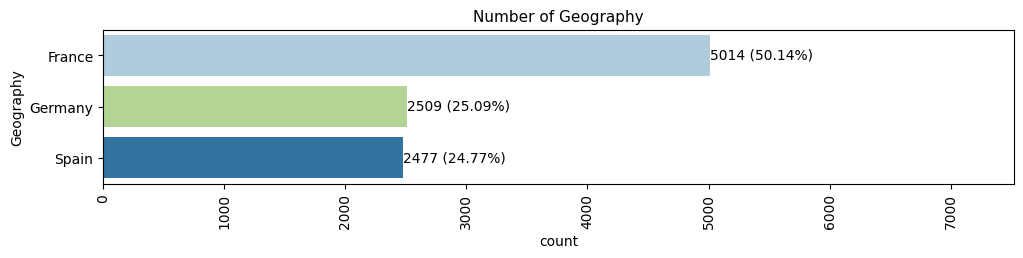

In [ ]:
# Display the number of customers with regards to Geography
show_countplot(data = df, feature = 'Geography', figsize = (11.75, 2))

**Observations:**
* Geography shows a higher number of customers are located in France (with 5,014). List is followed by:
  * Germany (with 2,509)
  * Spain (with 2,477)

##### Observations on Gender:

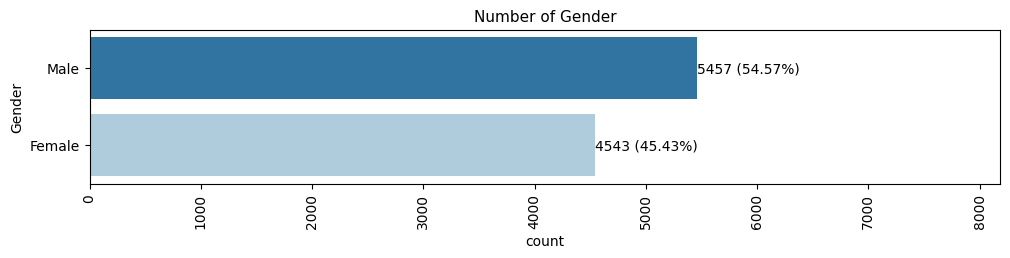

In [ ]:
# Display the number of customers with regards to Gender
show_countplot(data = df, feature = 'Gender', figsize = (11.75, 2))

**Observations:**
* Gender shows a higher number of customers are male gender (with 5,457) compared to customers that are female gender (with 4,543).

##### Observations on HasCrCard:

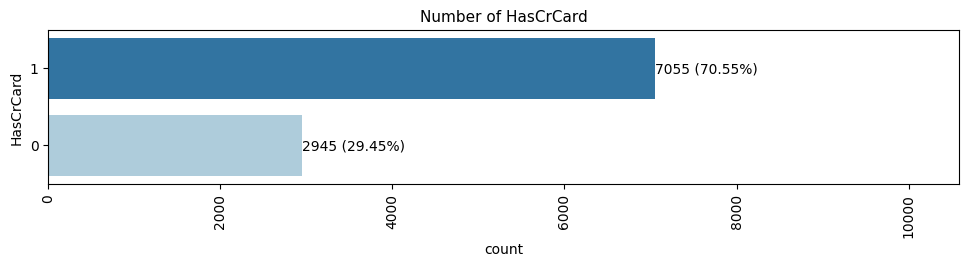

In [ ]:
# Display the number of customers with regards to HasCrCard
show_countplot(data = df, feature = 'HasCrCard', figsize = (11.75, 2))

**Observations:**
* HasCrCard shows a higher number of customers who have a credit card (with 7,055) compared to customers who don't have a credit card (with 2,945).

##### Observations on IsActiveMember:

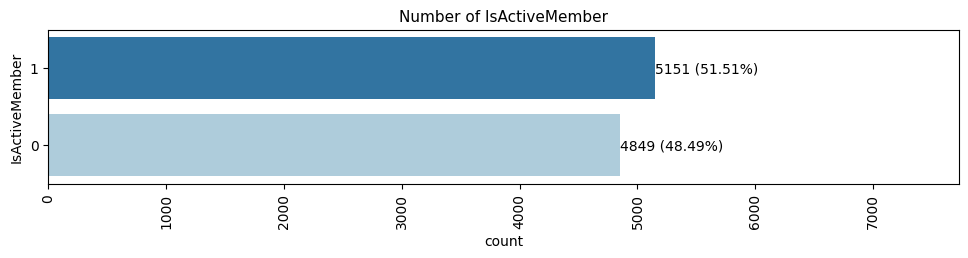

In [ ]:
# Display the number of customers with regards to IsActiveMember
show_countplot(data = df, feature = 'IsActiveMember', figsize = (11.75, 2))

**Observations:**
* IsActiveMember shows a higher number of customers who are active members (with 5,151) compared to customers who are not active members (with 4,849).

##### Observations on Exited:

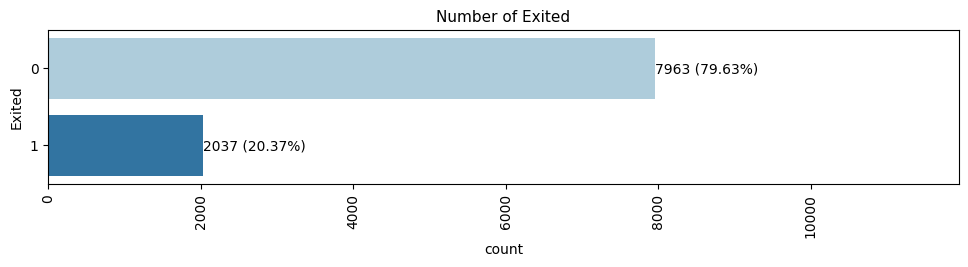

In [ ]:
# Display the number of customers with regards to Exited
show_countplot(data = df, feature = 'Exited', figsize = (11.75, 2))

**Observations:**
* Exited shows a higher number of customers who have not churned (with 7,963) compared to customers who have churned (with 2,037).

##### Observations on CreditScore:

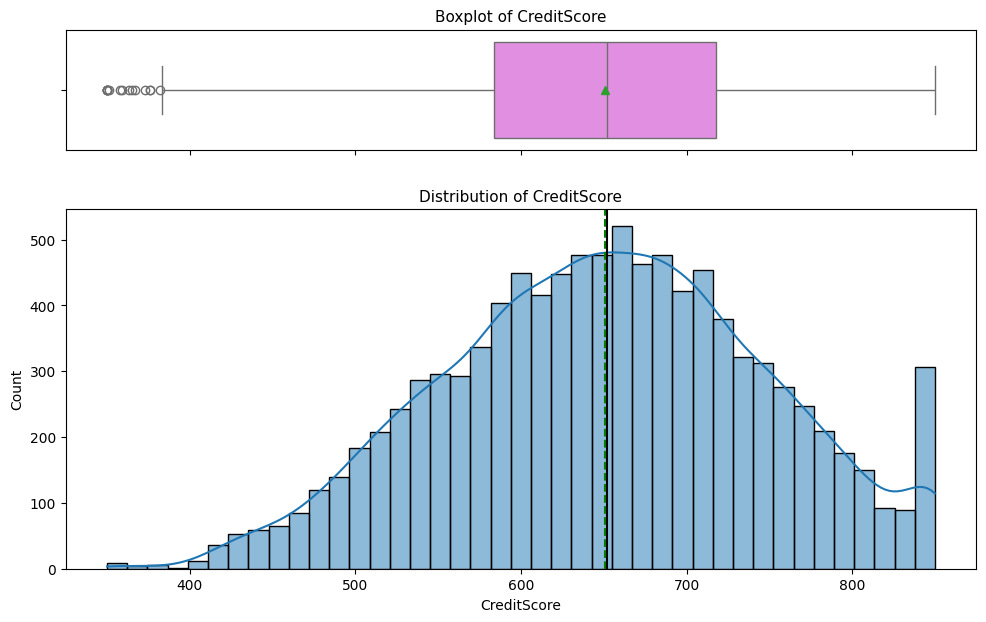

In [ ]:
# Display the distribution of customers with regards to CreditScore
show_boxplot_histplot(data = df, feature = 'CreditScore')

In [ ]:
# Create a dataset of outliers for CreditScore
df_creditscore_outliers = get_outliers(data = df, feature = 'CreditScore')

df_creditscore_outliers

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
7             8    15656148     Obinna          376   Germany  Female   29   
942         943    15804586        Lin          376    France  Female   46   
1193       1194    15779947     Thomas          363     Spain  Female   28   
1405       1406    15612494  Panicucci          359    France  Female   44   
1631       1632    15685372   Azubuike          350     Spain    Male   54   
1838       1839    15758813   Campbell          350   Germany    Male   39   
1962       1963    15692416  Aikenhead          358     Spain  Female   52   
2473       2474    15679249       Chou          351   Germany  Female   57   
2579       2580    15597896   Ozoemena          365   Germany    Male   30   
8154       8155    15791533     Ch'ien          367     Spain    Male   42   
8723       8724    15803202  Onyekachi          350    France    Male   51   
8762       8763    15765173        Lin          350    France  Female   60   
9210       9211    15792650      Watts          382     Spain    Male   36   
9356       9357    15734711     Loggia          373    France    Male   42   
9624       9625    15668309     Maslow          350    France  Female   40   

      Tenure      Balance  NumOfProducts  HasCrCard  IsActiveMember  \
7          4 115046.74000              4          1               0   
942        6      0.00000              1          1               0   
1193       6 146098.43000              3          1               0   
1405       6 128747.69000              1          1               0   
1631       1 152677.48000              1          1               1   
1838       0 109733.20000              2          0               0   
1962       8 143542.36000              3          1               0   
2473       4 163146.46000              1          1               0   
2579       0 127760.07000              1          1               0   
8154       6  93608.28000              1          1               0   
8723      10      0.00000              1          1               1   
8762       3      0.00000              1          0               0   
9210       0      0.00000              1          1               1   
9356       7      0.00000              1          1               0   
9624       0 111098.85000              1          1               1   

      EstimatedSalary  Exited  
7        119346.88000       1  
942      157333.69000       1  
1193     100615.14000       1  
1405     146955.71000       1  
1631     191973.49000       1  
1838     123602.11000       1  
1962     141959.11000       1  
2473     169621.69000       1  
2579      81537.85000       1  
8154     168816.73000       1  
8723     125823.79000       1  
8762     113796.15000       1  
9210     179540.73000       1  
9356      77786.37000       1  
9624     172321.21000       1

**Observations:**
* CreditScore does have a slightly sharp bell curve and follows normal distribution.
* This column is slightly left skewed.
* There are 15 outliers present in this column.
* The mean value is near the median.
* The mean and median credit score is close to 652.

##### Observations on Age:

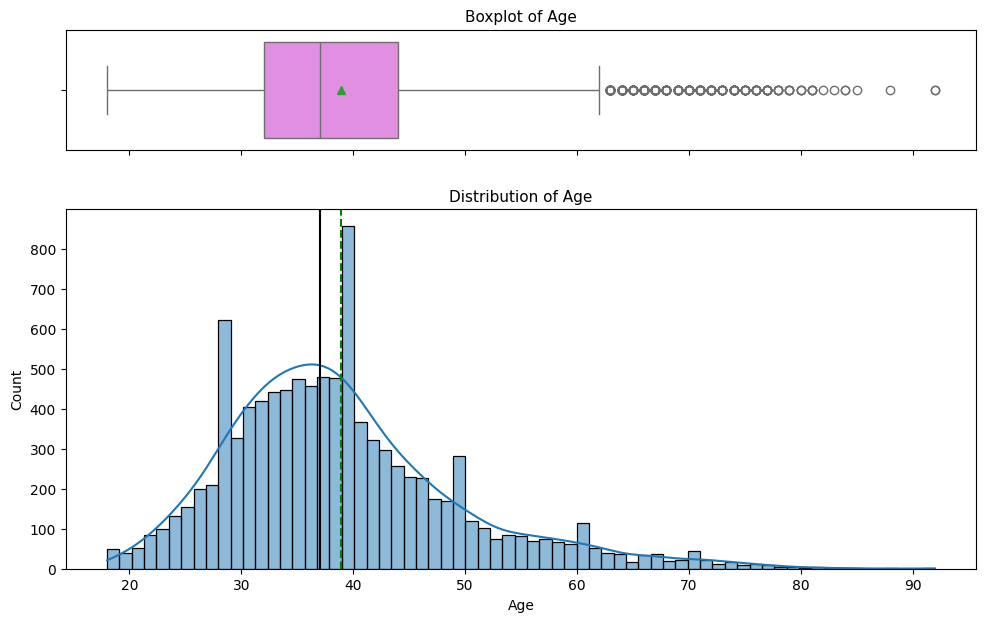

In [ ]:
# Display the distribution of customers with regards to Age
show_boxplot_histplot(data = df, feature = 'Age')

In [ ]:
# Create a dataset of outliers for Age
df_age_outliers = get_outliers(data = df, feature = 'Age')

df_age_outliers

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
58           59    15623944        T'ien          511     Spain  Female   66   
85           86    15805254      Ndukaku          652     Spain  Female   75   
104         105    15804919     Dunbabin          670     Spain  Female   65   
158         159    15589975      Maclean          646    France  Female   73   
181         182    15789669         Hsia          510    France    Male   65   
...         ...         ...          ...          ...       ...     ...  ...   
9753       9754    15705174    Chiedozie          656   Germany    Male   68   
9765       9766    15777067       Thomas          445    France    Male   64   
9832       9833    15814690  Chukwujekwu          595   Germany  Female   64   
9894       9895    15704795        Vagin          521    France  Female   77   
9936       9937    15653037        Parks          609    France    Male   77   

      Tenure      Balance  NumOfProducts  HasCrCard  IsActiveMember  \
58         4      0.00000              1          1               0   
85        10      0.00000              2          1               1   
104        1      0.00000              1          1               1   
158        6  97259.25000              1          0               1   
181        2      0.00000              2          1               1   
...      ...          ...            ...        ...             ...   
9753       7 153545.11000              1          1               1   
9765       2 136770.67000              1          0               1   
9832       2 105736.32000              1          1               1   
9894       6      0.00000              2          1               1   
9936       1      0.00000              1          0               1   

      EstimatedSalary  Exited  
58         1643.11000       1  
85       114675.75000       0  
104      177655.68000       1  
158      104719.66000       0  
181       48071.61000       0  
...               ...     ...  
9753     186574.68000       0  
9765      43678.06000       0  
9832      89935.73000       1  
9894      49054.10000       0  
9936      18708.76000       0  

[359 rows x 14 columns]

**Observations:**
* Age does have a slightly sharp bell curve and follows normal distribution.
* This column is right skewed.
* There are 359 outliers present in this column.
* The mean value is near the median.
* The mean and median age is close to 38 years old.

##### Observations on Tenure:

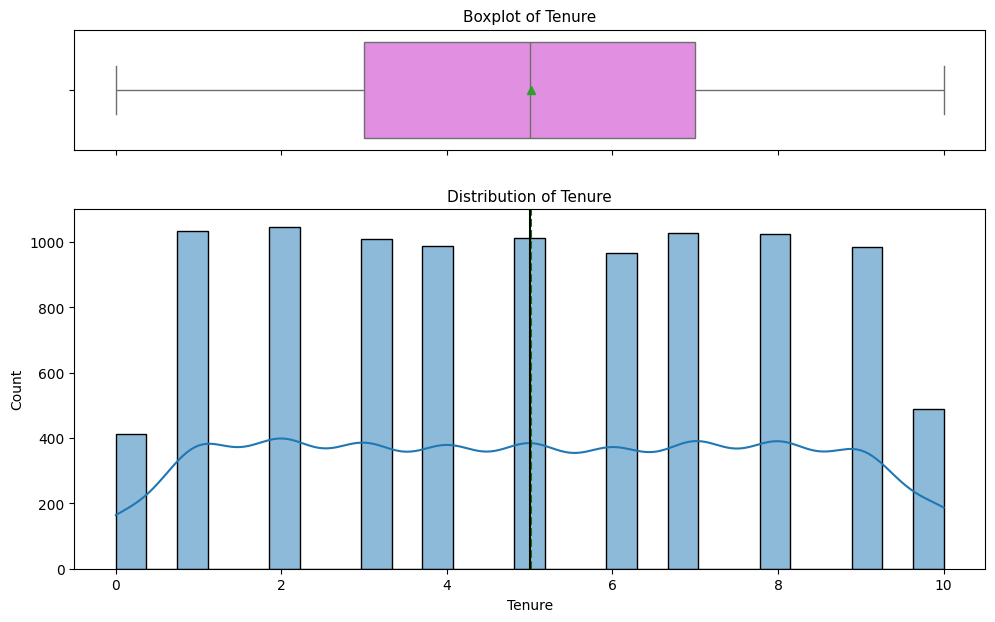

In [ ]:
# Display the distribution of customers with regards to Tenure
show_boxplot_histplot(data = df, feature = 'Tenure')

**Observations:**
* Tenure follows a slightly uniform distributions.
* There are no outliers present in this column.
* The mean value is near the median.
* The mean and median tenure is close to 5 years old.

##### Observations on Balance:

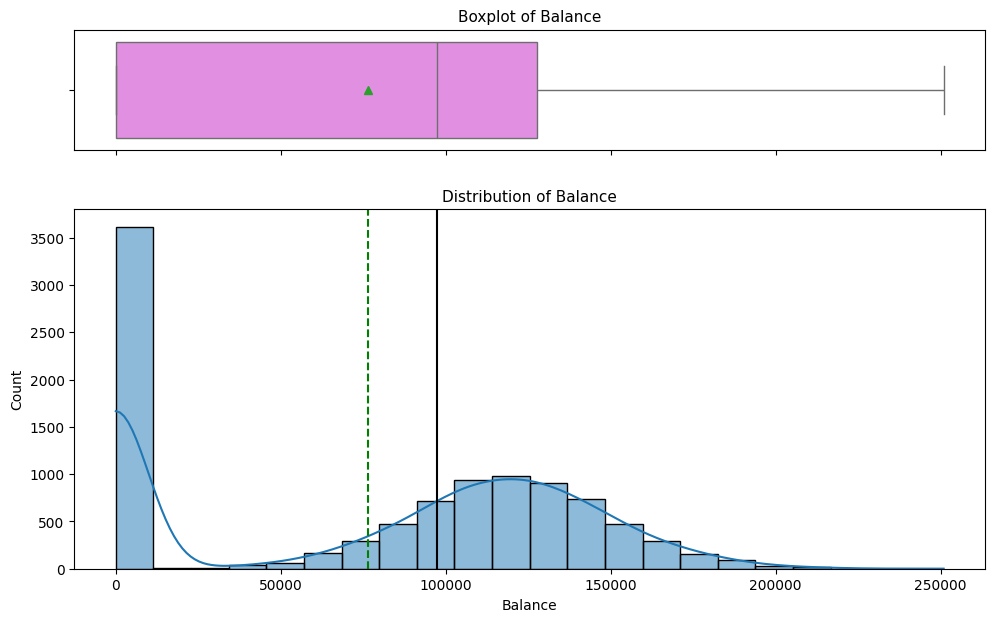

In [ ]:
# Display the distribution of customers with regards to Balance
show_boxplot_histplot(data = df, feature = 'Balance')

**Observations:**
* Balance follows a bimodal distribution.
* This column is slightly left skewed.
* There are no outliers present in this column.
* The mean value is around 76,485.89.
* The median value is 97,198.54.

##### Observations on NumOfProducts:

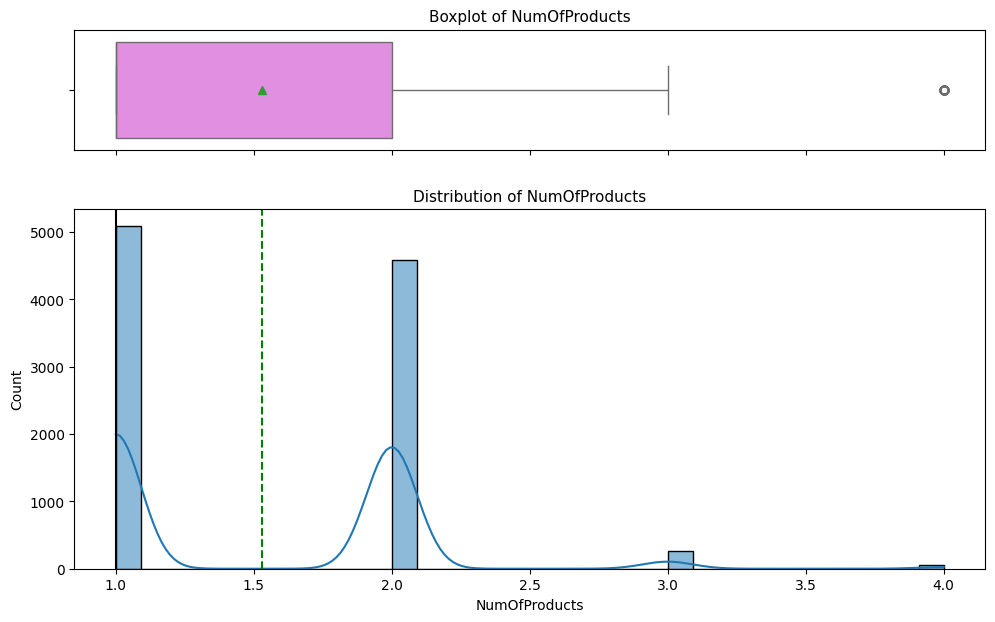

In [ ]:
# Display the distribution of customers with regards to NumOfProducts
show_boxplot_histplot(data = df, feature = 'NumOfProducts')

In [ ]:
# Create a dataset of outliers for NumOfProducts
df_numofproducts_outliers = get_outliers(data = df, feature = 'NumOfProducts')

df_numofproducts_outliers

RowNumber  CustomerId           Surname  CreditScore Geography  Gender  \
7             8    15656148            Obinna          376   Germany  Female   
70           71    15703793        Konovalova          738   Germany    Male   
1254       1255    15610383        Dumetolisa          628    France  Female   
1469       1470    15670374            Wright          819   Germany  Female   
1488       1489    15625824         Kornilova          596     Spain    Male   
1701       1702    15605279           Francis          792    France    Male   
1876       1877    15664754            Steele          640   Germany    Male   
2124       2125    15603851            Galkin          704    France    Male   
2196       2197    15791700  Ugochukwutubelum          773   Germany    Male   
2285       2286    15783615             Ramos          630   Germany    Male   
2462       2463    15704442           Fleming          672    France  Female   
2499       2500    15634974           Seppelt          614    France  Female   
2509       2510    15689341             Gibbs          655    France  Female   
2541       2542    15679770             Smith          611    France  Female   
2614       2615    15640846          Chibueze          546   Germany  Female   
2617       2618    15602735               Kuo          692   Germany    Male   
2872       2873    15671591       Castiglione          439     Spain    Male   
3152       3153    15724161            Sutton          644    France  Female   
3365       3366    15764431         Chinwenma          671     Spain  Female   
3841       3842    15750778         Ponomarev          653    France  Female   
4013       4014    15653776            Salier          720   Germany  Female   
4014       4015    15597914         Evdokimov          641   Germany  Female   
4166       4167    15654562                Ma          850     Spain  Female   
4260       4261    15664555            Hughes          587    France    Male   
4403       4404    15616859           Bonwick          602   Germany  Female   
4511       4512    15568006        Ukaegbunam          634    France  Female   
4516       4517    15812210           Yashina          497   Germany  Female   
4606       4607    15784958             Allan          797    France  Female   
4654       4655    15593976           Swanson          578   Germany  Female   
4748       4749    15759067            Bromby          537   Germany  Female   
4822       4823    15805704            Murphy          745    France  Female   
5010       5011    15719508             Davis          575   Germany    Male   
5137       5138    15601594         Ifeanacho          698    France  Female   
5235       5236    15608528             Munro          645    France  Female   
5386       5387    15668283          Gardiner          642    France    Male   
5700       5701    15812888         Perreault          447    France    Male   
5904       5905    15664270         Balsillie          692   Germany    Male   
6150       6151    15625761           Maclean          632   Germany    Male   
6172       6173    15656822               Day          568   Germany    Male   
6279       6280    15608338         Chiemenam          757     Spain  Female   
6750       6751    15690546             Riley          618    France  Female   
6875       6876    15665283           Brookes          610    France  Female   
7257       7258    15648681          Voronoff          747    France  Female   
7457       7458    15668889           Galgano          665   Germany  Female   
7567       7568    15750545        Chidiebere          629    France    Male   
7698       7699    15691513           Dawkins          592    France    Male   
7724       7725    15673591         Oluchukwu          842    France    Male   
7729       7730    15681007               Yen          850    France  Female   
8041       8042    15701439           Fanucci          698     Spain  Female   
8590  

**Observations:**
* NumOfProducts follows a multimodal distributions.
* There are 60 outliers present in this column.
* The mean value is around 1.5.
* The median value is 1.


##### Observations on EstimatedSalary:

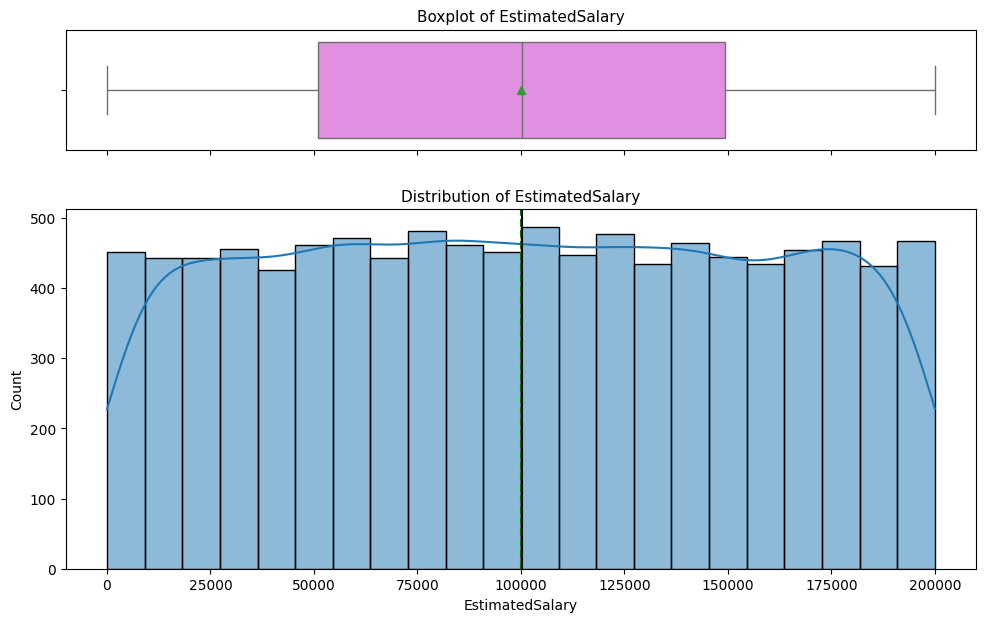

In [ ]:
# Display the distribution of customers with regards to EstimatedSalary
show_boxplot_histplot(data = df, feature = 'EstimatedSalary')

**Observations:**
* EstimatedSalary follows a slightly uniform distributions.
* There are no outliers present in this column.
* The mean value is near the median.
* The mean and median estimated salary is close to 100,000.

### Multivariate Analysis

##### Observations on Numerical Variable Relationships:

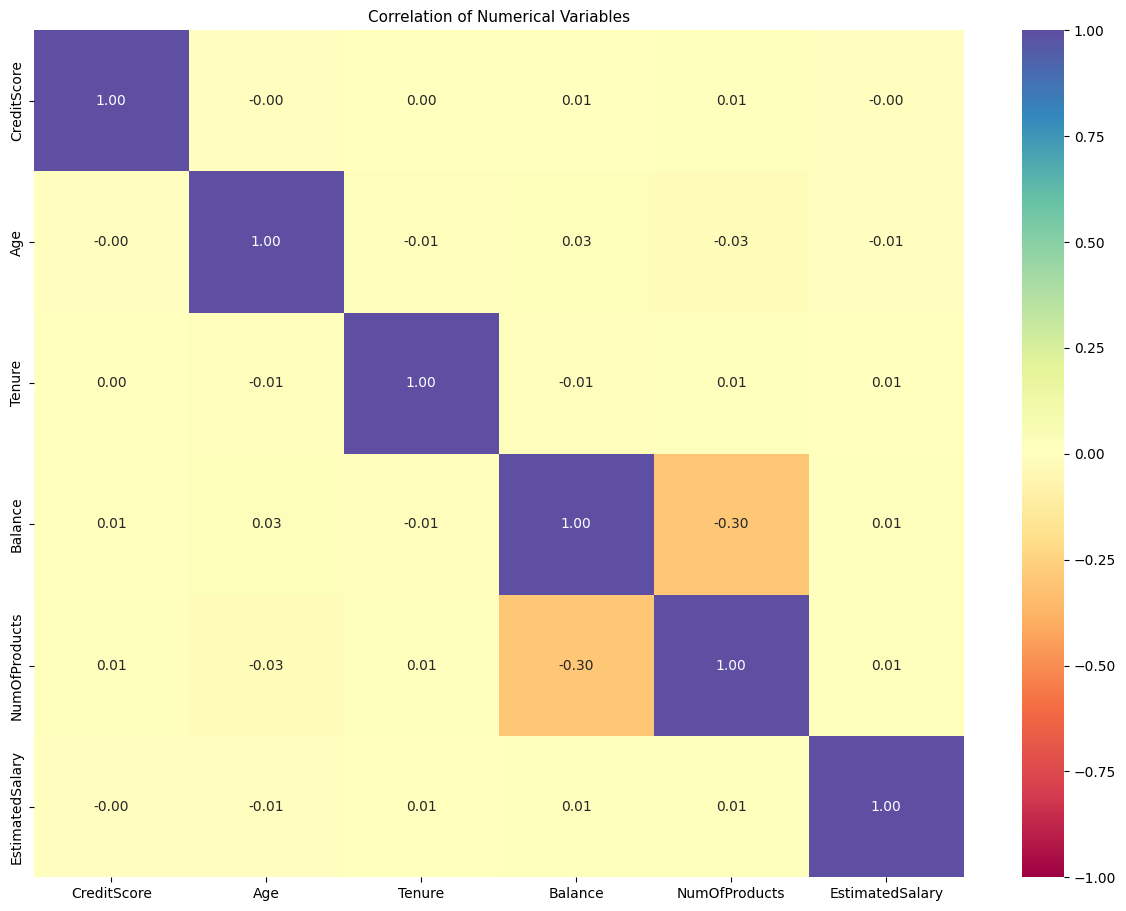

In [ ]:
# Display the relationships of Numerical Variables
show_heatmap(data = df[num_cols], figsize = (15, 11))

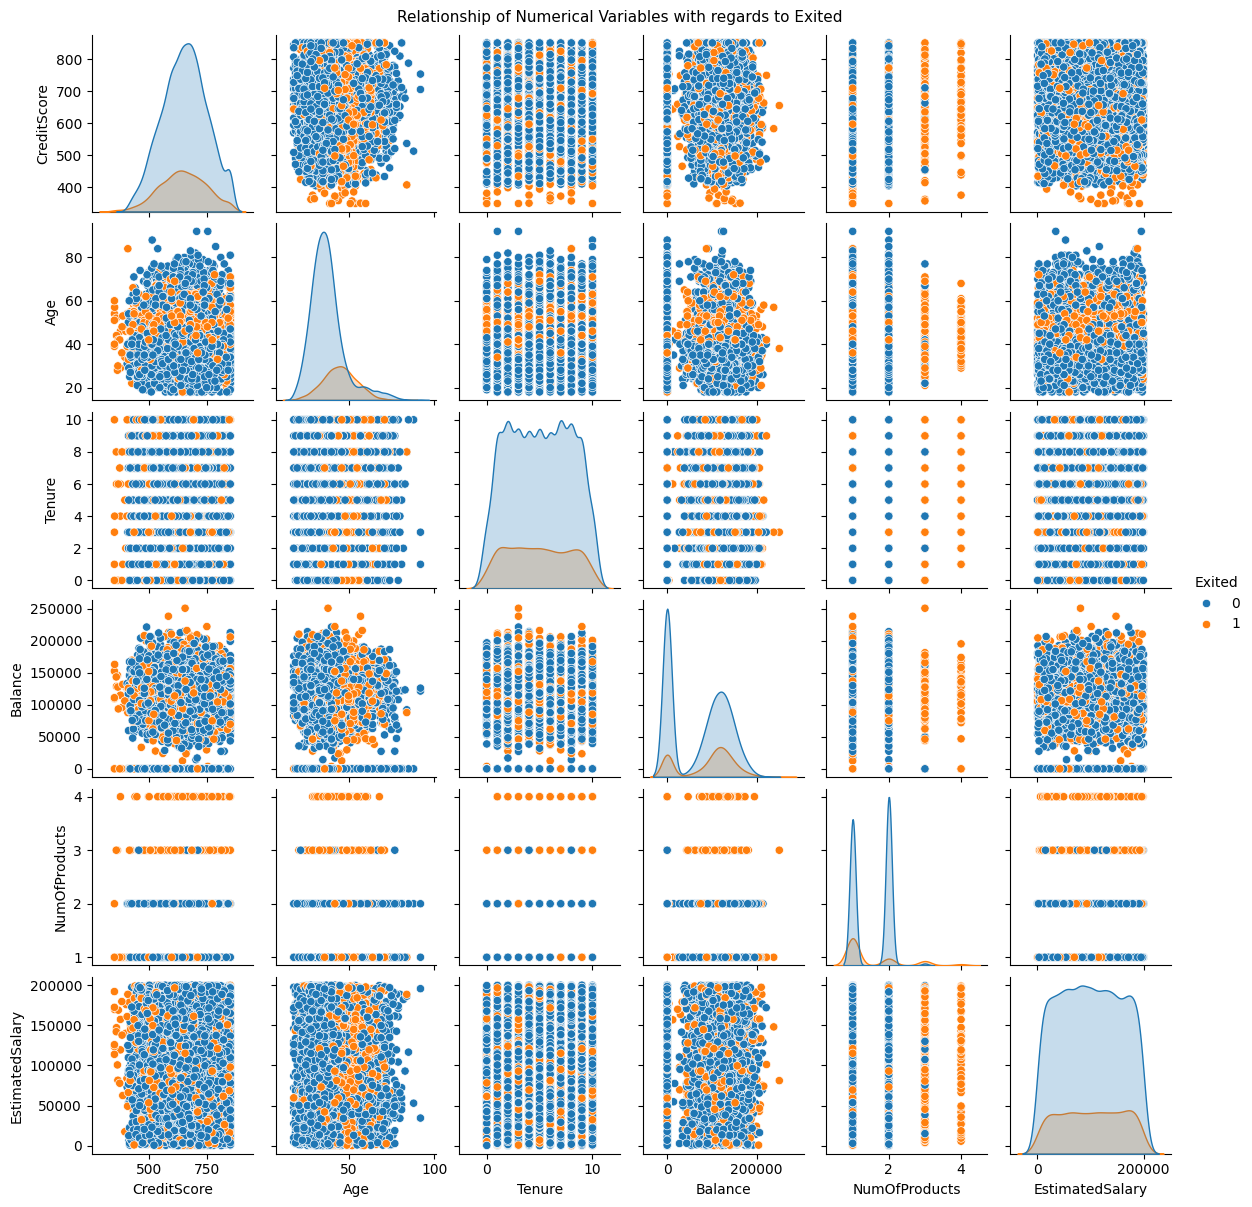

In [ ]:
# Display the relationships of Numerical Variables with regards to Exited
show_pairplot(data = df[num_cols + ['Exited']], hue = 'Exited')

**Observations:**
* The orange spots are the customers who left (Exited = 1) while the blue spots are the existing customers (Exited = 0).
* All the numerical columns shows small correlation.

##### Observations on CreditScore:

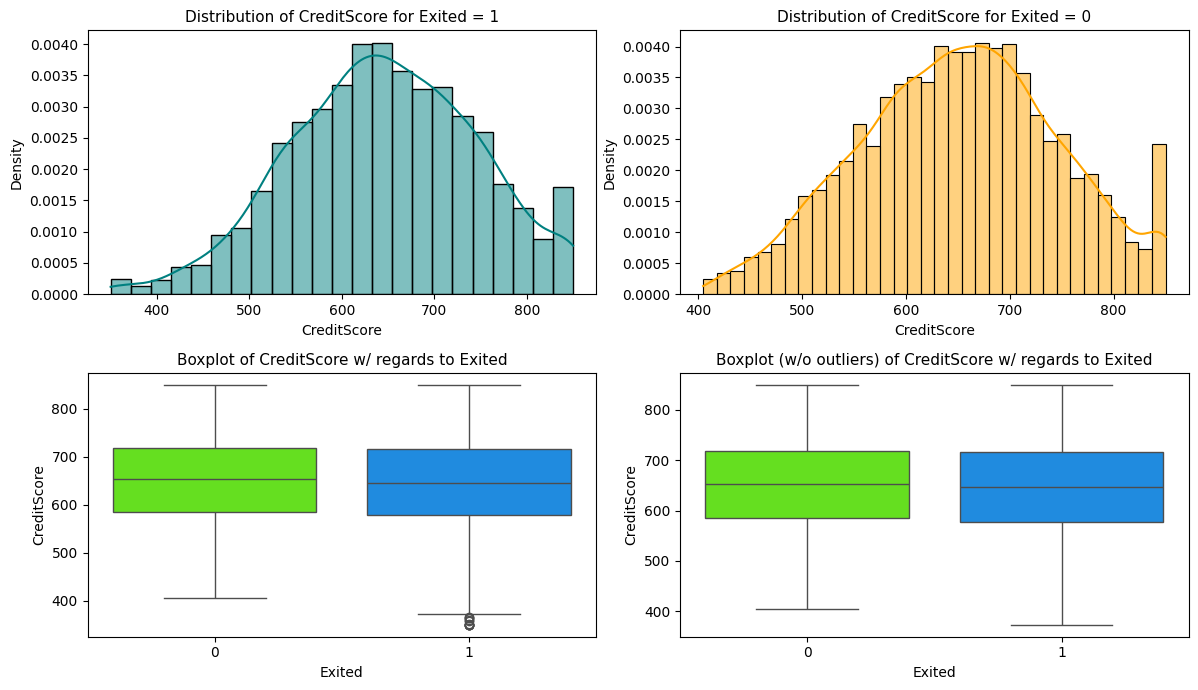

In [ ]:
# Display the distribution of CreditScore with regards to Exited
show_distplot_boxplot(data = df, feature = 'CreditScore', target = 'Exited', figsize = (12, 7))

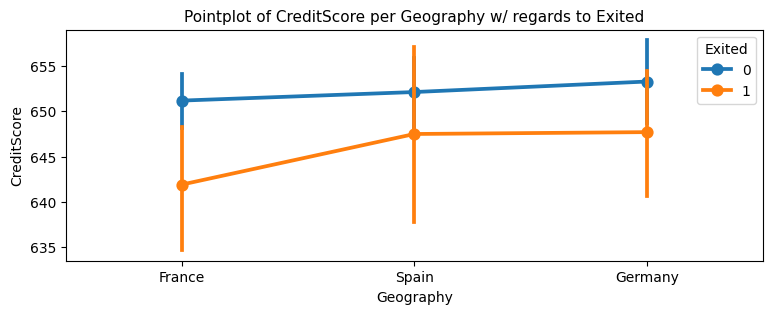

In [ ]:
# Display the distribution of CreditScore per Geography with regards to Exited
show_pointplot(data = df, feature = 'CreditScore', category = 'Geography', target = 'Exited', figsize = (9, 3))

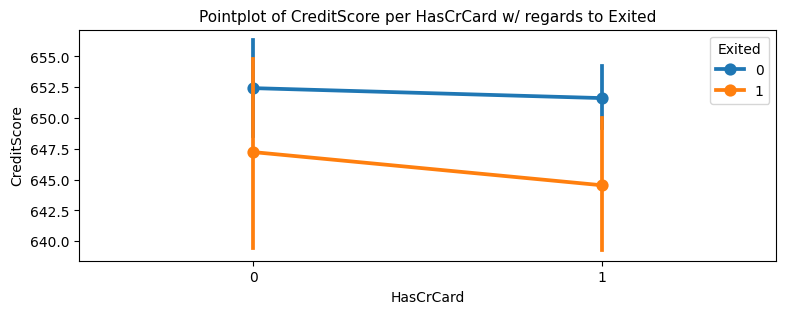

In [ ]:
# Display the distribution of CreditScore per HasCrCard with regards to Exited
show_pointplot(data = df, feature = 'CreditScore', category = 'HasCrCard', target = 'Exited', figsize = (9, 3))

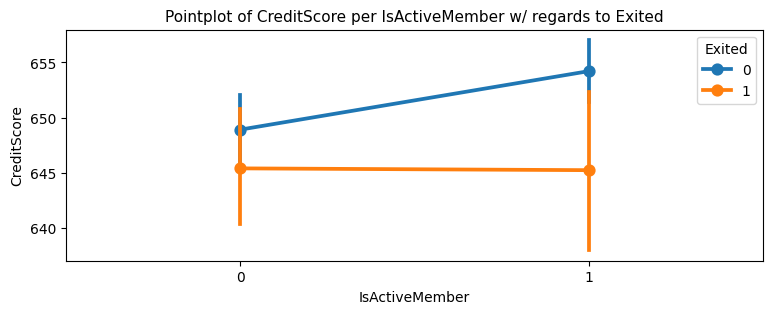

In [ ]:
# Display the distribution of CreditScore per IsActiveMember with regards to Exited
show_pointplot(data = df, feature = 'CreditScore', category = 'IsActiveMember', target = 'Exited', figsize = (9, 3))

**Observations:**
* CreditScore shows that the majority of customers who have churned do have slightly lower credit score compared to existing customers.
* The median credit score is close to 652 for both churned and existing customers.
* There are outliers in credit score only for churned customers.

##### Observations on Age:

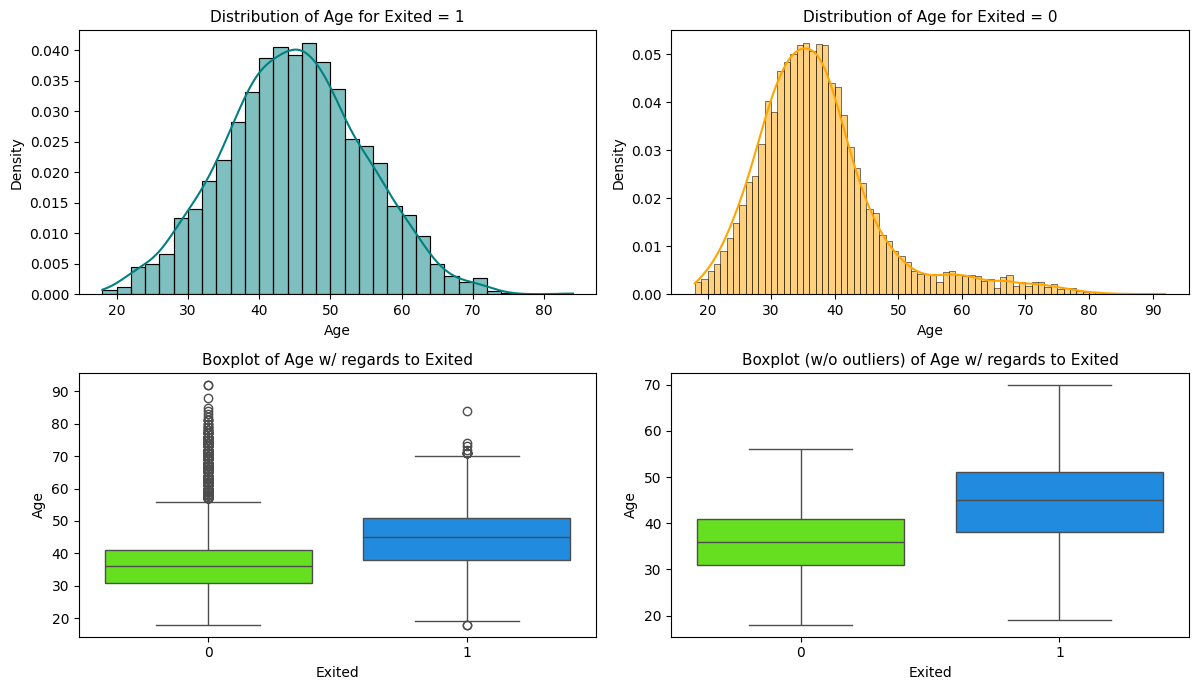

In [ ]:
# Display the distribution of Age with regards to Exited
show_distplot_boxplot(data = df, feature = 'Age', target = 'Exited', figsize = (12, 7))

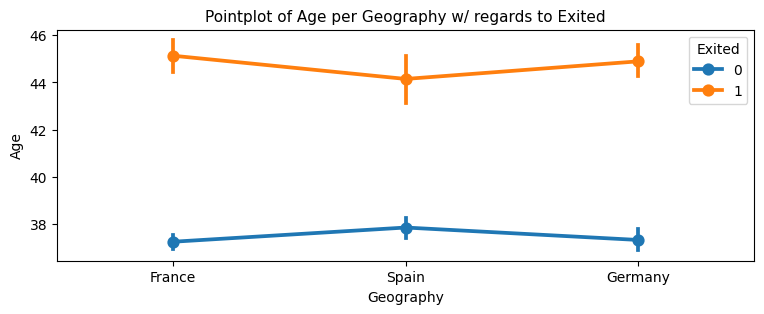

In [ ]:
# Display the distribution of Age per Geography with regards to Exited
show_pointplot(data = df, feature = 'Age', category = 'Geography', target = 'Exited', figsize = (9, 3))

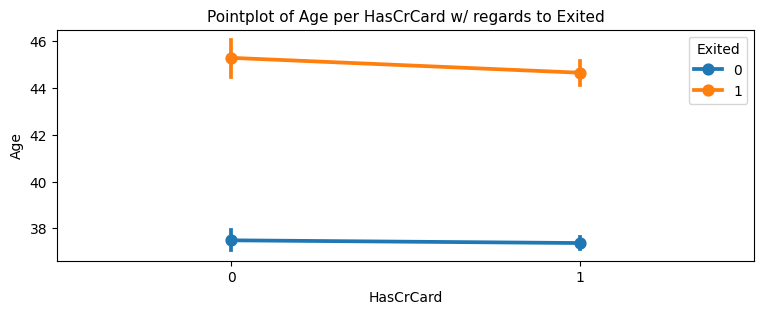

In [ ]:
# Display the distribution of Age per HasCrCard with regards to Exited
show_pointplot(data = df, feature = 'Age', category = 'HasCrCard', target = 'Exited', figsize = (9, 3))

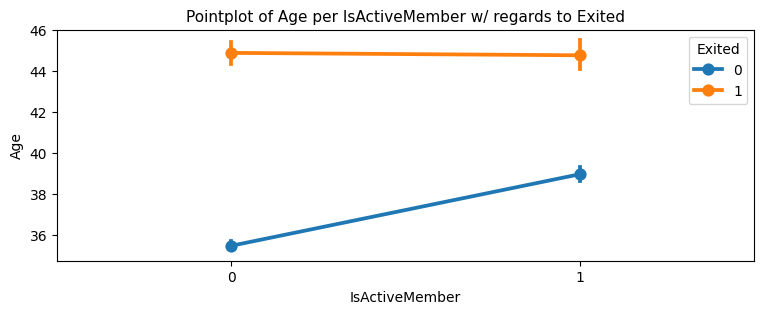

In [ ]:
# Display the distribution of Age per IsActiveMember with regards to Exited
show_pointplot(data = df, feature = 'Age', category = 'IsActiveMember', target = 'Exited', figsize = (9, 3))

**Observations:**
* Age shows that the majority of customers who have churned do have significantly older age compared to existing customers.
* The median age is 45 years old for churned customers.
* The median age is 36 years old for existing customers.

##### Observations on Tenure:

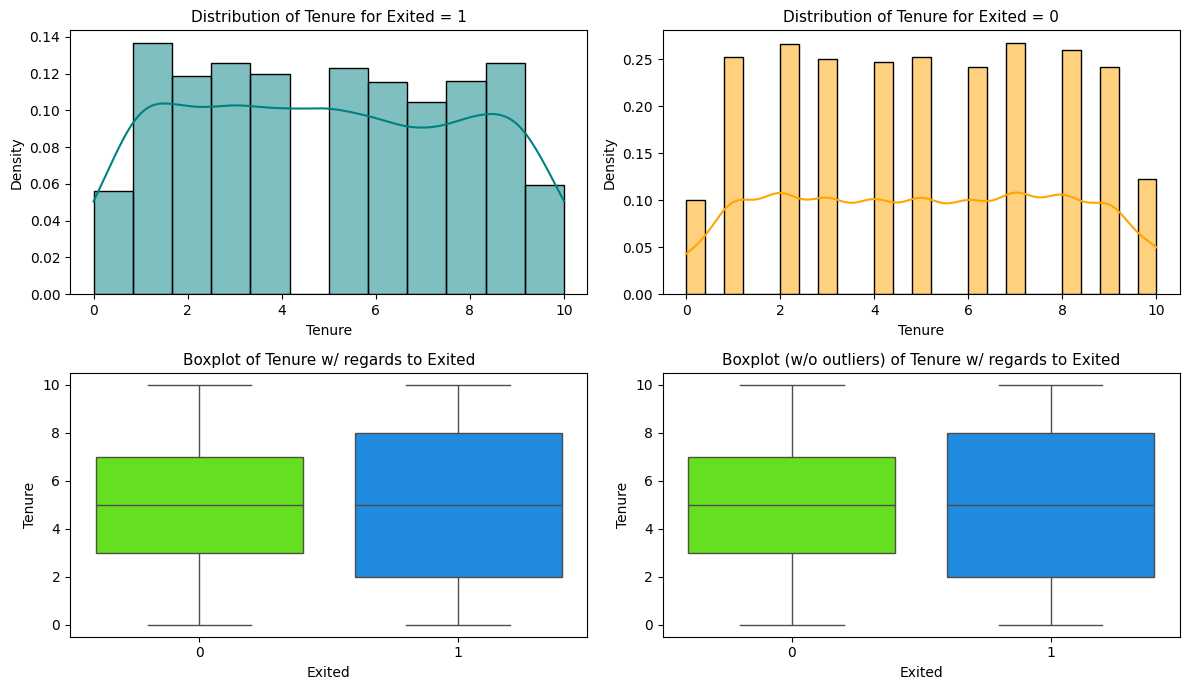

In [ ]:
# Display the distribution of Tenure with regards to Exited
show_distplot_boxplot(data = df, feature = 'Tenure', target = 'Exited', figsize = (12, 7))

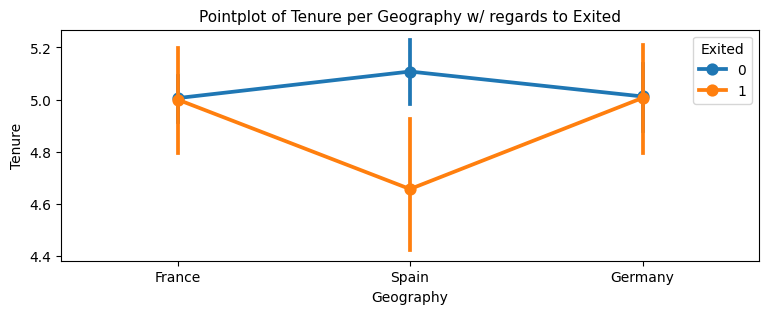

In [ ]:
# Display the distribution of Tenure per Geography with regards to Exited
show_pointplot(data = df, feature = 'Tenure', category = 'Geography', target = 'Exited', figsize = (9, 3))

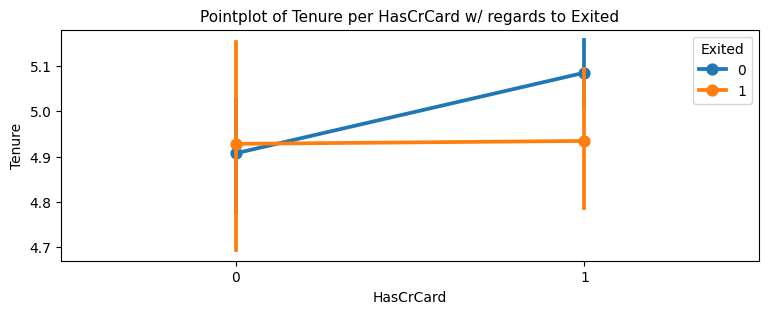

In [ ]:
# Display the distribution of Tenure per HasCrCard with regards to Exited
show_pointplot(data = df, feature = 'Tenure', category = 'HasCrCard', target = 'Exited', figsize = (9, 3))

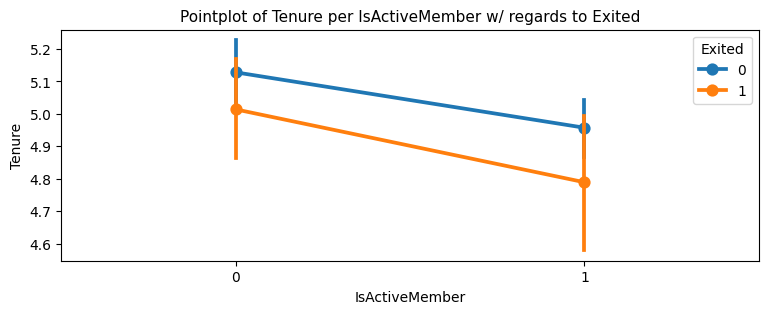

In [ ]:
# Display the distribution of Tenure per IsActiveMember with regards to Exited
show_pointplot(data = df, feature = 'Tenure', category = 'IsActiveMember', target = 'Exited', figsize = (9, 3))

**Observations:**
* Tenure shows that the majority of customers do not have significant difference in tenure for both churned and existing customers.
* The median tenure is 5 years for both churned and existing customers.

##### Observations on Balance:

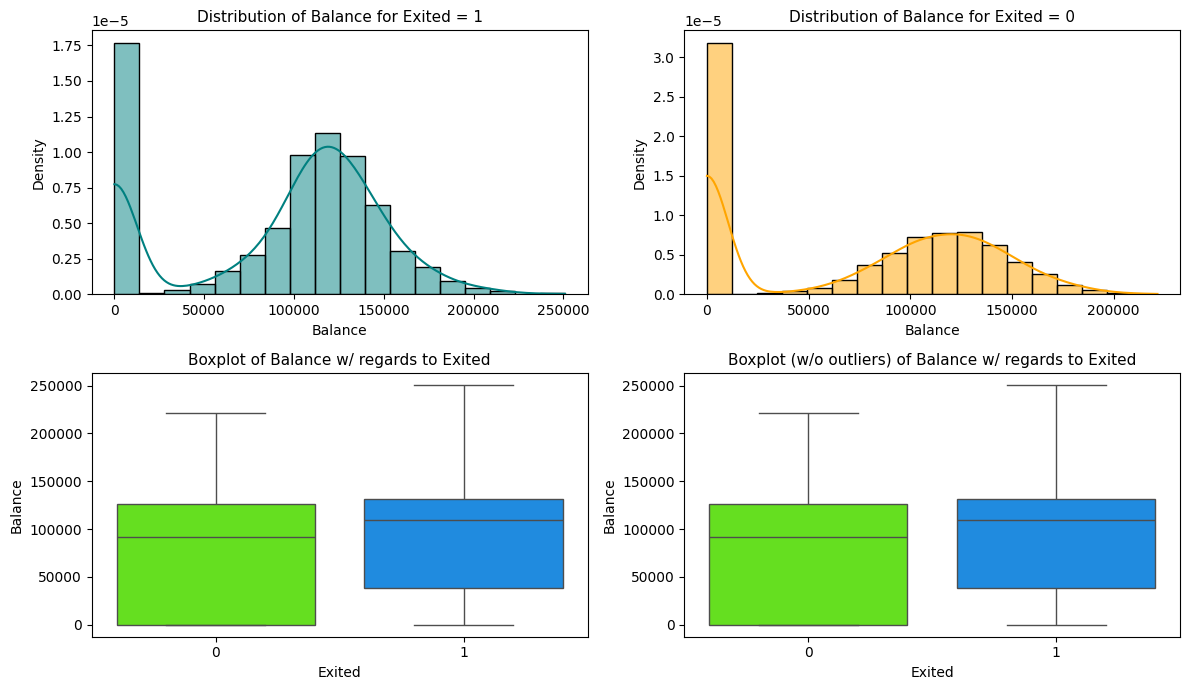

In [ ]:
# Display the distribution of Balance with regards to Exited
show_distplot_boxplot(data = df, feature = 'Balance', target = 'Exited', figsize = (12, 7))

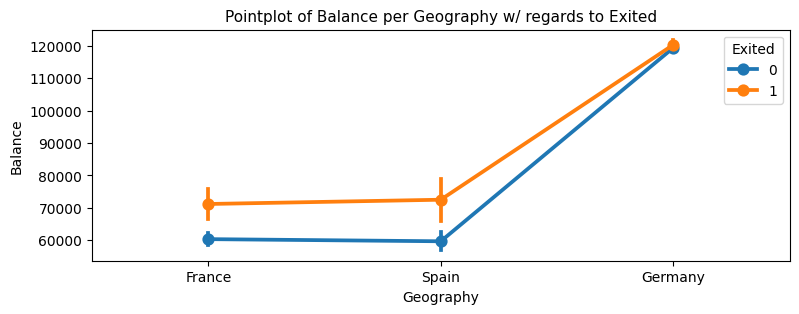

In [ ]:
# Display the distribution of Balance per Geography with regards to Exited
show_pointplot(data = df, feature = 'Balance', category = 'Geography', target = 'Exited', figsize = (9, 3))

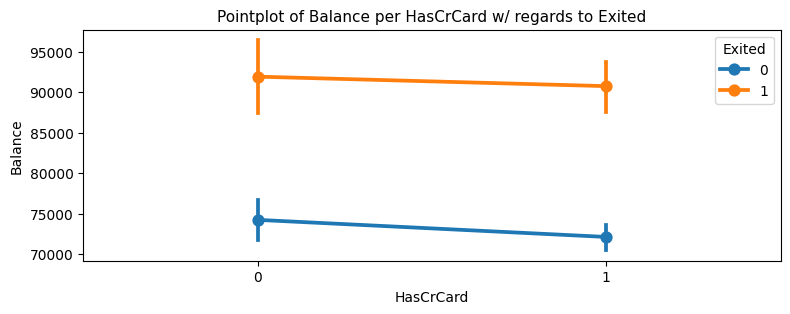

In [ ]:
# Display the distribution of Balance per HasCrCard with regards to Exited
show_pointplot(data = df, feature = 'Balance', category = 'HasCrCard', target = 'Exited', figsize = (9, 3))

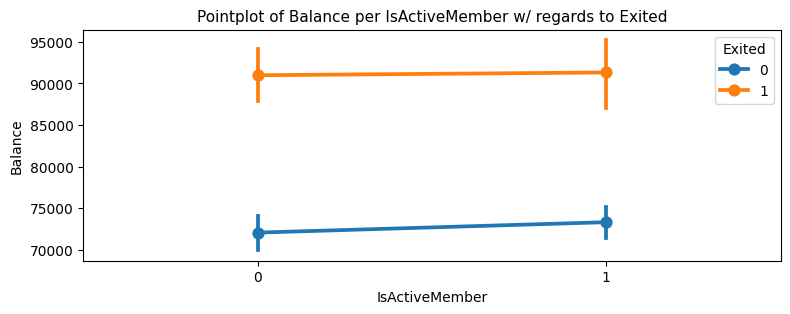

In [ ]:
# Display the distribution of Balance per IsActiveMember with regards to Exited
show_pointplot(data = df, feature = 'Balance', category = 'IsActiveMember', target = 'Exited', figsize = (9, 3))

**Observations:**
* Balance shows that the majority of customers who have churned do have significantly higher balance compared to existing customers.
* The median balance is close to 109,349 for churned customers.
* The median balance is close to 92,072 for existing customers.

##### Observations on NumOfProducts:

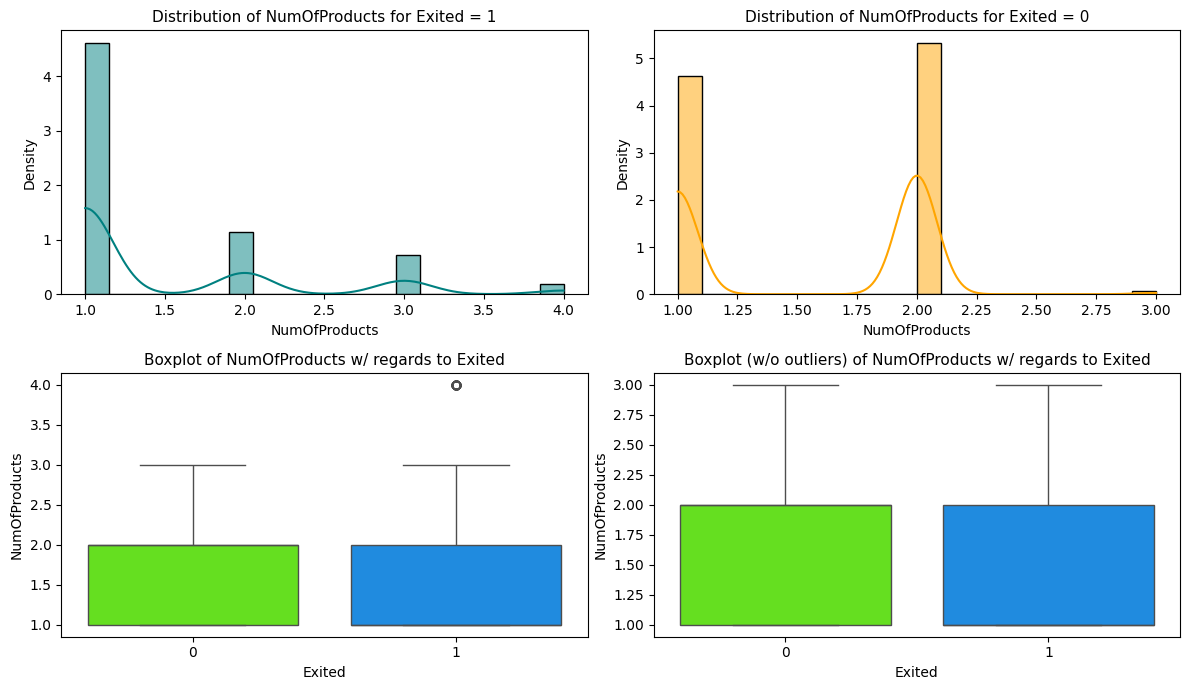

In [ ]:
# Display the distribution of NumOfProducts with regards to Exited
show_distplot_boxplot(data = df, feature = 'NumOfProducts', target = 'Exited', figsize = (12, 7))

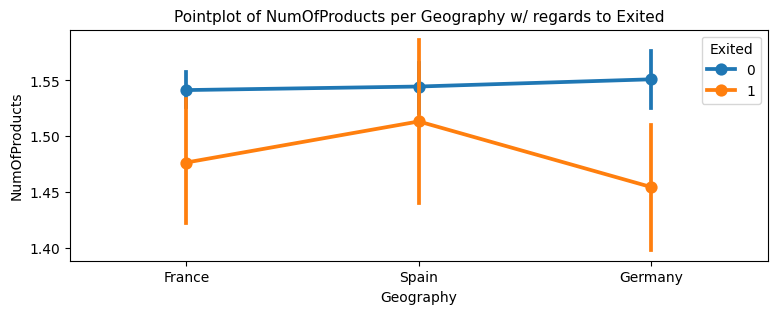

In [ ]:
# Display the distribution of NumOfProducts per Geography with regards to Exited
show_pointplot(data = df, feature = 'NumOfProducts', category = 'Geography', target = 'Exited', figsize = (9, 3))

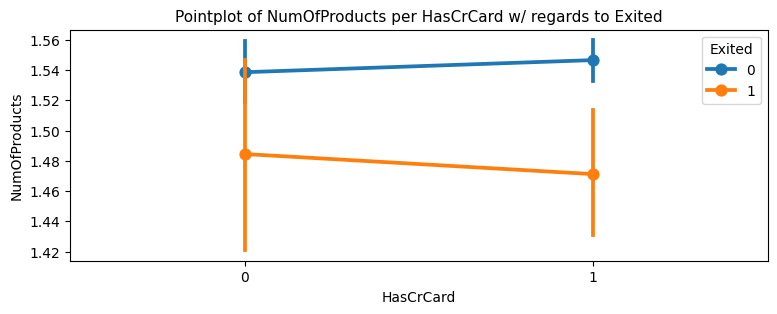

In [ ]:
# Display the distribution of NumOfProducts per HasCrCard with regards to Exited
show_pointplot(data = df, feature = 'NumOfProducts', category = 'HasCrCard', target = 'Exited', figsize = (9, 3))

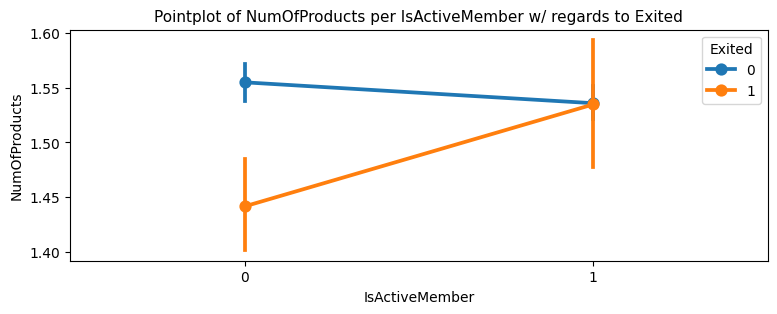

In [ ]:
# Display the distribution of NumOfProducts per IsActiveMember with regards to Exited
show_pointplot(data = df, feature = 'NumOfProducts', category = 'IsActiveMember', target = 'Exited', figsize = (9, 3))

**Observations:**
* NumOfProducts shows that the majority of customers who have churned do have slightly lower number of products compared to existing customers.
* The median number of products is 1 for churned customers.
* The median number of products is 2 for existing customers.

##### Observations on EstimatedSalary:

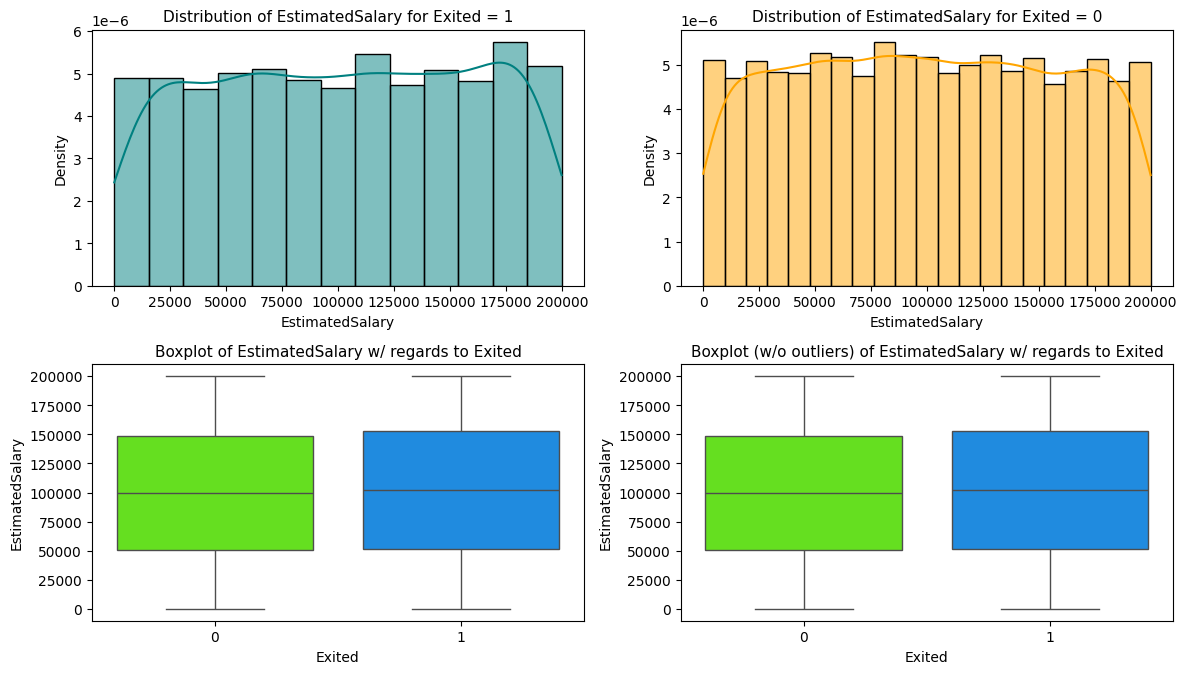

In [ ]:
# Display the distribution of EstimatedSalary with regards to Exited
show_distplot_boxplot(data = df, feature = 'EstimatedSalary', target = 'Exited', figsize = (12, 7))

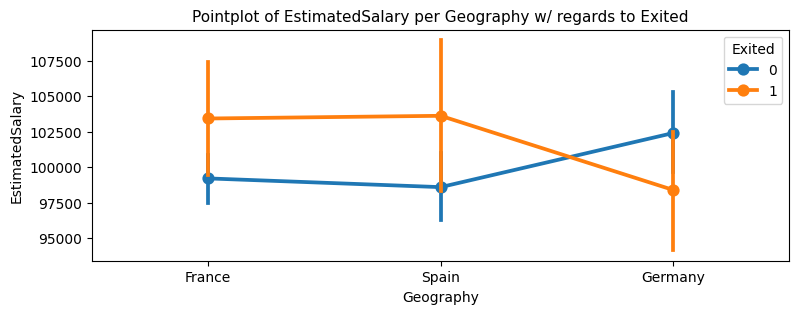

In [ ]:
# Display the distribution of EstimatedSalary per Geography with regards to Exited
show_pointplot(data = df, feature = 'EstimatedSalary', category = 'Geography', target = 'Exited', figsize = (9, 3))

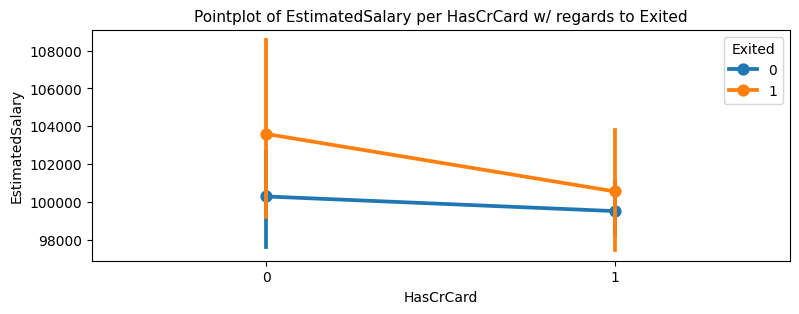

In [ ]:
# Display the distribution of EstimatedSalary per HasCrCard with regards to Exited
show_pointplot(data = df, feature = 'EstimatedSalary', category = 'HasCrCard', target = 'Exited', figsize = (9, 3))

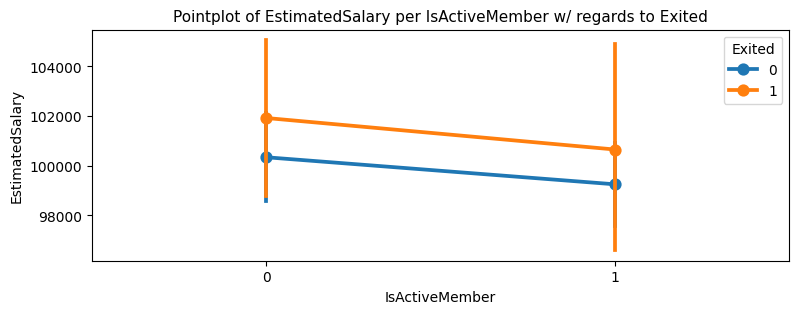

In [ ]:
# Display the distribution of EstimatedSalary per IsActiveMember with regards to Exited
show_pointplot(data = df, feature = 'EstimatedSalary', category = 'IsActiveMember', target = 'Exited', figsize = (9, 3))

**Observations:**
* EstimatedSalary shows that the majority of customers do not have significant difference in estimated salary for both churned and existing customers.
* The median salary is close to 102,460 for churned customers.
* The median salary is close to 99,645 for existing customers.

##### Observations on Geography:

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000

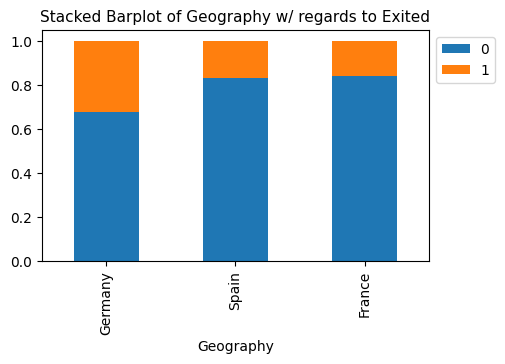

In [ ]:
# Display the distribution of Geography with regards to Exited
show_stackedbarplot(data = df, feature = 'Geography', target = 'Exited')

**Observations:**
* Geography shows a higher percentage of customers who have churned are located in Germany (with 32.44%). List is followed by:
  * Spain (with 16.67%)
  * France (with 16.15%)


##### Observations on Gender:

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000

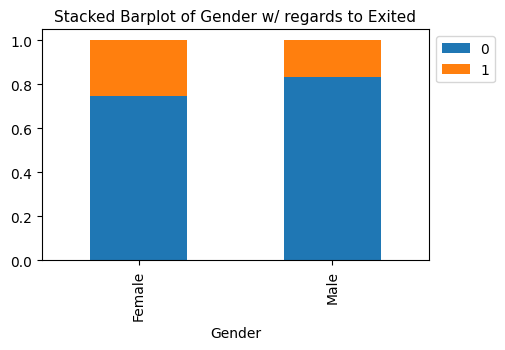

In [ ]:
# Display the distribution of Gender with regards to Exited
show_stackedbarplot(data = df, feature = 'Gender', target = 'Exited')

**Observations:**
* Gender shows a higher percentage of customers who have churned are female gender (with 25.07%) compared to customers with male gender (with 16.46%).

##### Observations on HasCrCard:

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000

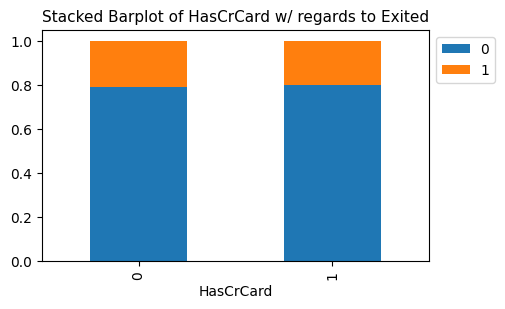

In [ ]:
# Display the distribution of HasCrCard with regards to Exited
show_stackedbarplot(data = df, feature = 'HasCrCard', target = 'Exited')

**Observations:**
* HasCrCard shows a slightly higher percentage of customers who have churned have no credit card (with 20.81%) compared to customers who have a credit card (with 20.18%).

##### Observations on IsActiveMember:

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000

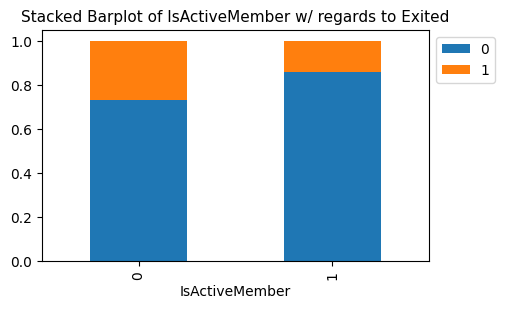

In [ ]:
# Display the distribution of IsActiveMember with regards to Exited
show_stackedbarplot(data = df, feature = 'IsActiveMember', target = 'Exited')

**Observations:**
* IsActiveMember shows a higher percentage of customers who have churned are not active members (with 26.85%) compared to customers who are active members (with 14.27%).

##### Observations on Chi-Square Test:

In [ ]:
# Display the significance of each feature with regards to Exited
show_significance(data = df[cat_cols + num_cols], target = 'Exited')

* Geography score has an effect on Exited as the p_value 0.0 < significance_level 0.05
* Gender score has an effect on Exited as the p_value 0.0 < significance_level 0.05
  HasCrCard score has no effect on Exited as the p_value 0.492 >= significance_level 0.05
* IsActiveMember score has an effect on Exited as the p_value 0.0 < significance_level 0.05
* CreditScore score has an effect on Exited as the p_value 0.049 < significance_level 0.05
* Age score has an effect on Exited as the p_value 0.0 < significance_level 0.05
  Tenure score has no effect on Exited as the p_value 0.178 >= significance_level 0.05
* Balance score has an effect on Exited as the p_value 0.0 < significance_level 0.05
* NumOfProducts score has an effect on Exited as the p_value 0.0 < significance_level 0.05
  EstimatedSalary score has no effect on Exited as the p_value 0.492 >= significance_level 0.05


**Observations:**
* The following columns show a significant correlation with Exited using the Chi-Square test:
  * CreditScore
  * Age
  * Balance
  * NumOfProducts
  * Geography
  * Gender
  * IsActiveMember
* All other columns shows no significant correlation with Exited.

### Key Observations on Exploratory Data Analysis

In [ ]:
# Display the statistical summary of all columns for churned customer
df[df['Exited'] == 1].describe(include = 'all').transpose()

count unique      top  freq           mean         std  \
RowNumber       2037.00000    NaN      NaN   NaN     4905.91753  2866.85524   
CustomerId      2037.00000    NaN      NaN   NaN 15690051.96465 72692.62392   
Surname               2037   1188    Smith     9            NaN         NaN   
CreditScore     2037.00000    NaN      NaN   NaN      645.35150   100.32150   
Geography             2037      3  Germany   814            NaN         NaN   
Gender                2037      2   Female  1139            NaN         NaN   
Age             2037.00000    NaN      NaN   NaN       44.83800     9.76156   
Tenure          2037.00000    NaN      NaN   NaN        4.93274     2.93611   
Balance         2037.00000    NaN      NaN   NaN    91108.53934 58360.79482   
NumOfProducts   2037.00000    NaN      NaN   NaN        1.47521     0.80152   
HasCrCard       2037.00000    NaN      NaN   NaN        0.69907     0.45878   
IsActiveMember  2037.00000    NaN      NaN   NaN        0.36082     0.48036   
EstimatedSalary 2037.00000    NaN      NaN   NaN   101465.67753 57912.41807   
Exited          2037.00000    NaN      NaN   NaN        1.00000     0.00000   

                           min            25%            50%            75%  \
RowNumber              1.00000     2419.00000     4871.00000     7404.00000   
CustomerId      15565706.00000 15627360.00000 15688963.00000 15753092.00000   
Surname                    NaN            NaN            NaN            NaN   
CreditScore          350.00000      578.00000      646.00000      716.00000   
Geography                  NaN            NaN            NaN            NaN   
Gender                     NaN            NaN            NaN            NaN   
Age                   18.00000       38.00000       45.00000       51.00000   
Tenure                 0.00000        2.00000        5.00000        8.00000   
Balance                0.00000    38340.02000   109349.29000   131433.33000   
NumOfProducts          1.00000        1.00000        1.00000        2.00000   
HasCrCard              0.00000        0.00000        1.00000        1.00000   
IsActiveMember         0.00000        0.00000        0.00000        1.00000   
EstimatedSalary       11.58000    51907.72000   102460.84000   152422.91000   
Exited                 1.00000        1.00000        1.00000        1.00000   

                           max  
RowNumber           9999.00000  
CustomerId      15815656.00000  
Surname                    NaN  
CreditScore          850.00000  
Geography                  NaN  
Gender                     NaN  
Age                   84.00000  
Tenure                10.00000  
Balance           250898.09000  
NumOfProducts          4.00000  
HasCrCard              1.00000  
IsActiveMember         1.00000  
EstimatedSalary   199808.10000  
Exited                 1.00000

In [ ]:
# Display the statistical summary of all columns for existing customer
df[df['Exited'] == 0].describe(include = 'all').transpose()

count unique     top  freq           mean         std  \
RowNumber       7963.00000    NaN     NaN   NaN     5024.69496  2891.68205   
CustomerId      7963.00000    NaN     NaN   NaN 15691167.88170 71744.23494   
Surname               7963   2616   Scott    26            NaN         NaN   
CreditScore     7963.00000    NaN     NaN   NaN      651.85320    95.65384   
Geography             7963      3  France  4204            NaN         NaN   
Gender                7963      2    Male  4559            NaN         NaN   
Age             7963.00000    NaN     NaN   NaN       37.40839    10.12536   
Tenure          7963.00000    NaN     NaN   NaN        5.03328     2.88066   
Balance         7963.00000    NaN     NaN   NaN    72745.29678 62848.04070   
NumOfProducts   7963.00000    NaN     NaN   NaN        1.54427     0.50954   
HasCrCard       7963.00000    NaN     NaN   NaN        0.70715     0.45510   
IsActiveMember  7963.00000    NaN     NaN   NaN        0.55456     0.49704   
EstimatedSalary 7963.00000    NaN     NaN   NaN    99738.39177 57405.58697   
Exited          7963.00000    NaN     NaN   NaN        0.00000     0.00000   

                           min            25%            50%            75%  \
RowNumber              2.00000     2526.50000     5042.00000     7525.50000   
CustomerId      15565701.00000 15628818.50000 15691543.00000 15753352.50000   
Surname                    NaN            NaN            NaN            NaN   
CreditScore          405.00000      585.00000      653.00000      718.00000   
Geography                  NaN            NaN            NaN            NaN   
Gender                     NaN            NaN            NaN            NaN   
Age                   18.00000       31.00000       36.00000       41.00000   
Tenure                 0.00000        3.00000        5.00000        7.00000   
Balance                0.00000        0.00000    92072.68000   126410.28000   
NumOfProducts          1.00000        1.00000        2.00000        2.00000   
HasCrCard              0.00000        0.00000        1.00000        1.00000   
IsActiveMember         0.00000        0.00000        1.00000        1.00000   
EstimatedSalary       90.07000    50783.49000    99645.04000   148609.95500   
Exited                 0.00000        0.00000        0.00000        0.00000   

                           max  
RowNumber          10000.00000  
CustomerId      15815690.00000  
Surname                    NaN  
CreditScore          850.00000  
Geography                  NaN  
Gender                     NaN  
Age                   92.00000  
Tenure                10.00000  
Balance           221532.80000  
NumOfProducts          3.00000  
HasCrCard              1.00000  
IsActiveMember         1.00000  
EstimatedSalary   199992.48000  
Exited                 0.00000

* As observed during visualizations and in Chi-Square test, the following columns show a significant correlation with Exited:
  * CreditScore
  * Age
  * Balance
  * NumOfProducts
  * Geography
  * Gender
  * IsActiveMember
* Geography shows a higher percentage of customers who have churned are located in Germany (with 32.44%). List is followed by:
  * Spain (with 16.67%)
  * France (with 16.15%)
* Gender shows a higher percentage of customers who have churned are female gender (with 25.07%) compared to customers with male gender (with 16.46%).
* IsActiveMember shows a higher percentage of customers who have churned are not active members (with 26.85%) compared to customers who are active members (with 14.27%).
* CreditScore shows that the majority of customers who have churned do have slightly lower credit score (mean value close to 645) compared to existing customers (mean value close to 651).
* Age shows that the majority of customers who have churned do have significantly older age (mean value close to 44 years old) compared to existing customers (mean value close to 37 years old).
* Balance shows that the majority of customers who have churned do have significantly higher balance (mean value close to 91,108) compared to existing customers (mean value close to 72,745).
* NumOfProducts shows that the majority of customers who have churned do have slightly lower number of products (mean value close to 1.4) compared to existing customers (mean value close to 1.5).
* The following columns contain outliers:
  * CreditScore
  * Age
  * NumOfProducts

## Data Preprocessing

### Function Definition

In [ ]:
# User-defined functions
def show_boxplot_outliers(data, num_cols, figsize = (10, 10)):
  '''
  Description: Function to plot multiple boxplot to display the outliers
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    num_cols: list, required
      The column names of numeric columns
    figsize: tuple, optional
      The figure size in inches, default: (10, 10)
  '''
  plt.figure(figsize = figsize)

  for i, variable in enumerate(num_cols):
      plt.subplot(4, 4, i + 1)
      plt.boxplot(data[variable], whis = 1.5)
      plt.tight_layout()
      plt.title(variable)

  plt.show()

### Outlier Detection

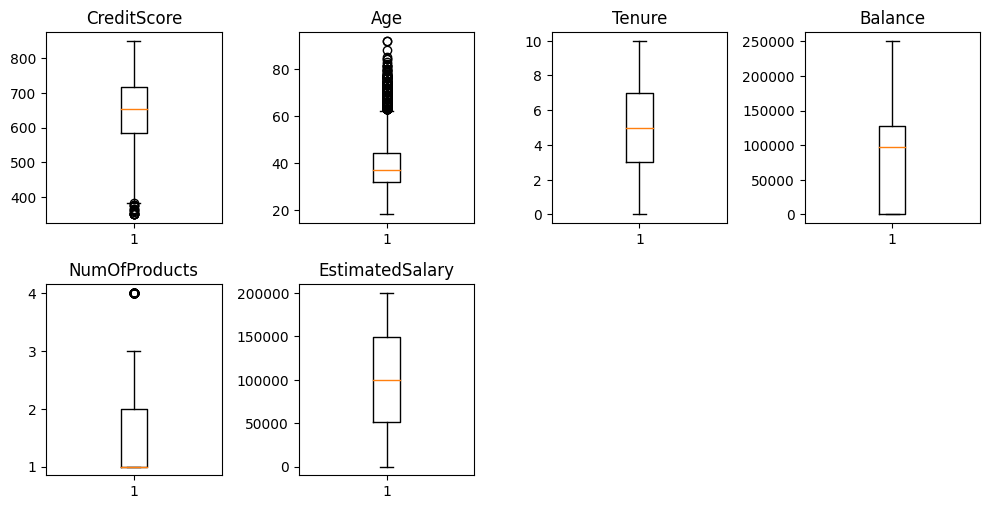

In [ ]:
# Display if there are outliers in the numerical columns
show_boxplot_outliers(data = df, num_cols = num_cols)

**Observations:**
* The following columns contain outliers:
  * CreditScore
  * Age
  * NumOfProducts
* These outliers will be treated in data normalization step.

### Train-Validation-Test Split

In [ ]:
# Create a copy of the DataFrame and drop columns that are not needed in the analysis
df_modeling = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, errors = 'ignore')

df_modeling

CreditScore Geography  Gender  Age  Tenure      Balance  NumOfProducts  \
0             619    France  Female   42       2      0.00000              1   
1             608     Spain  Female   41       1  83807.86000              1   
2             502    France  Female   42       8 159660.80000              3   
3             699    France  Female   39       1      0.00000              2   
4             850     Spain  Female   43       2 125510.82000              1   
...           ...       ...     ...  ...     ...          ...            ...   
9995          771    France    Male   39       5      0.00000              2   
9996          516    France    Male   35      10  57369.61000              1   
9997          709    France  Female   36       7      0.00000              1   
9998          772   Germany    Male   42       3  75075.31000              2   
9999          792    France  Female   28       4 130142.79000              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1     101348.88000       1  
1             0               1     112542.58000       0  
2             1               0     113931.57000       1  
3             0               0      93826.63000       0  
4             1               1      79084.10000       0  
...         ...             ...              ...     ...  
9995          1               0      96270.64000       0  
9996          1               1     101699.77000       0  
9997          0               1      42085.58000       1  
9998          1               0      92888.52000       1  
9999          1               0      38190.78000       0  

[10000 rows x 11 columns]

In [ ]:
# Create independent variable
if 'Exited' in df_modeling.dtypes:
  x = df_modeling.drop('Exited', axis = 1)

# Create dependent variable
if 'Exited' in df_modeling.dtypes:
  y = df_modeling.pop('Exited')

In [ ]:
# Split the training, testing, and validation data
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1, stratify = y, shuffle = True)

x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size = 0.25, random_state = 1, stratify = y_temp, shuffle = True)

In [ ]:
# Display the shape of training data
x_train.shape

(6000, 10)

In [ ]:
# Display the shape of validation data
x_val.shape

(2000, 10)

In [ ]:
# Display the shape of testing data
x_test.shape

(2000, 10)

**Observations:**
* The columns RowNumber, CustomerId and Surname were dropped since they will not be used in building the model.
* The training set has a shape of 6,000 rows with 10 columns, while the validation and testing sets have a shape of 2,000 rows with 10 columns.

### Dummy Variable Creation

In [ ]:
# Encode the categorical variables of training, testing, and testing data
x_train = pd.get_dummies(x_train, columns = ['Geography', 'Gender'], drop_first = True)
x_test = pd.get_dummies(x_test, columns = ['Geography', 'Gender'], drop_first = True)
x_val = pd.get_dummies(x_val, columns = ['Geography', 'Gender'], drop_first = True)

In [ ]:
# Display the shape of training data
x_train.shape

(6000, 11)

In [ ]:
# Display the shape of validation data
x_val.shape

(2000, 11)

In [ ]:
# Display the shape of testing data
x_test.shape

(2000, 11)

In [ ]:
# Display the summary of the training data
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 4472 to 29
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   int64  
 1   Age                6000 non-null   int64  
 2   Tenure             6000 non-null   int64  
 3   Balance            6000 non-null   float64
 4   NumOfProducts      6000 non-null   int64  
 5   HasCrCard          6000 non-null   int64  
 6   IsActiveMember     6000 non-null   int64  
 7   EstimatedSalary    6000 non-null   float64
 8   Geography_Germany  6000 non-null   uint8  
 9   Geography_Spain    6000 non-null   uint8  
 10  Gender_Male        6000 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 439.5 KB


In [ ]:
# Display the summary of the validation data
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 4693 to 627
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   Geography_Germany  2000 non-null   uint8  
 9   Geography_Spain    2000 non-null   uint8  
 10  Gender_Male        2000 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 146.5 KB


In [ ]:
# Display the summary of the testing data
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 4466 to 8350
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   Geography_Germany  2000 non-null   uint8  
 9   Geography_Spain    2000 non-null   uint8  
 10  Gender_Male        2000 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 146.5 KB


**Observations:**
* The column Geography was subjected to one-hot encoding to treat the categorical data and was converted to:
  * Geography_Germany
  * Geography_Spain
* The column Gender was also subjected to one-hot encoding to treat the categorical data and was converted to:
  * Gender_Male
* The training set now has a shape of 6,000 rows with 11 columns, while the validation and testing sets now have a shape of 2,000 rows with 11 columns.

### Data Normalization

In [ ]:
# Display the statistical summary of all columns for training data
x_train.describe(include = 'all').transpose()

count         mean         std       min         25%  \
CreditScore       6000.00000    651.11100    97.06527 350.00000   585.00000   
Age               6000.00000     39.04300    10.56220  18.00000    32.00000   
Tenure            6000.00000      4.97867     2.90883   0.00000     2.00000   
Balance           6000.00000  75458.31590 62622.30191   0.00000     0.00000   
NumOfProducts     6000.00000      1.53783     0.58762   1.00000     1.00000   
HasCrCard         6000.00000      0.70483     0.45616   0.00000     0.00000   
IsActiveMember    6000.00000      0.51967     0.49965   0.00000     0.00000   
EstimatedSalary   6000.00000 100513.40808 57636.95368  11.58000 51859.18000   
Geography_Germany 6000.00000      0.24850     0.43218   0.00000     0.00000   
Geography_Spain   6000.00000      0.25167     0.43401   0.00000     0.00000   
Gender_Male       6000.00000      0.54333     0.49816   0.00000     0.00000   

                           50%          75%          max  
CreditScore          653.00000    718.00000    850.00000  
Age                   37.00000     44.00000     92.00000  
Tenure                 5.00000      8.00000     10.00000  
Balance            95734.40000 127475.61250 250898.09000  
NumOfProducts          1.00000      2.00000      4.00000  
HasCrCard              1.00000      1.00000      1.00000  
IsActiveMember         1.00000      1.00000      1.00000  
EstimatedSalary   100969.70500 150174.49000 199970.74000  
Geography_Germany      0.00000      0.00000      1.00000  
Geography_Spain        0.00000      1.00000      1.00000  
Gender_Male            1.00000      1.00000      1.00000

In [ ]:
# Display the statistical summary of all columns for validation data
x_val.describe(include = 'all').transpose()

count        mean         std       min         25%  \
CreditScore       2000.00000   645.97650    95.57117 386.00000   579.00000   
Age               2000.00000    38.53250    10.49185  18.00000    31.00000   
Tenure            2000.00000     5.03700     2.88007   0.00000     3.00000   
Balance           2000.00000 78834.90530 62295.69166   0.00000     0.00000   
NumOfProducts     2000.00000     1.52250     0.57329   1.00000     1.00000   
HasCrCard         2000.00000     0.69900     0.45881   0.00000     0.00000   
IsActiveMember    2000.00000     0.50750     0.50007   0.00000     0.00000   
EstimatedSalary   2000.00000 97694.70772 56535.24985  91.75000 49826.25500   
Geography_Germany 2000.00000     0.25650     0.43681   0.00000     0.00000   
Geography_Spain   2000.00000     0.24000     0.42719   0.00000     0.00000   
Gender_Male       2000.00000     0.55150     0.49747   0.00000     0.00000   

                           50%          75%          max  
CreditScore          644.00000    712.00000    850.00000  
Age                   37.00000     43.00000     88.00000  
Tenure                 5.00000      7.00000     10.00000  
Balance           100398.24500 128827.11000 212692.97000  
NumOfProducts          1.00000      2.00000      4.00000  
HasCrCard              1.00000      1.00000      1.00000  
IsActiveMember         1.00000      1.00000      1.00000  
EstimatedSalary    95083.58000 143329.42250 199992.48000  
Geography_Germany      0.00000      1.00000      1.00000  
Geography_Spain        0.00000      0.00000      1.00000  
Gender_Male            1.00000      1.00000      1.00000

In [ ]:
# Display the statistical summary of all columns for testing data
x_test.describe(include = 'all').transpose()

count         mean         std       min         25%  \
CreditScore       2000.00000    653.33450    96.38513 350.00000   585.00000   
Age               2000.00000     38.94750    10.25297  18.00000    32.00000   
Tenure            2000.00000      5.09100     2.85356   0.00000     3.00000   
Balance           2000.00000  77219.59342 61777.08565   0.00000     0.00000   
NumOfProducts     2000.00000      1.51500     0.57179   1.00000     1.00000   
HasCrCard         2000.00000      0.71400     0.45200   0.00000     0.00000   
IsActiveMember    2000.00000      0.50900     0.50004   0.00000     0.00000   
EstimatedSalary   2000.00000 101216.26745 58058.08471 123.07000 50392.45750   
Geography_Germany 2000.00000      0.25250     0.43456   0.00000     0.00000   
Geography_Spain   2000.00000      0.24350     0.42930   0.00000     0.00000   
Gender_Male       2000.00000      0.54700     0.49791   0.00000     0.00000   

                           50%          75%          max  
CreditScore          657.00000    721.00000    850.00000  
Age                   37.00000     44.00000     83.00000  
Tenure                 5.00000      8.00000     10.00000  
Balance            98500.54000 127255.18250 214346.96000  
NumOfProducts          1.00000      2.00000      4.00000  
HasCrCard              1.00000      1.00000      1.00000  
IsActiveMember         1.00000      1.00000      1.00000  
EstimatedSalary   101957.90000 152168.00750 199805.63000  
Geography_Germany      0.00000      1.00000      1.00000  
Geography_Spain        0.00000      0.00000      1.00000  
Gender_Male            1.00000      1.00000      1.00000

In [ ]:
# Normalize the values of numeric columns
cols_num_norm = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

ssc = StandardScaler()

x_train[cols_num_norm] = ssc.fit_transform(x_train[cols_num_norm])
x_val[cols_num_norm] = ssc.transform(x_val[cols_num_norm])
x_test[cols_num_norm] = ssc.transform(x_test[cols_num_norm])

In [ ]:
# Display the statistical summary of all columns for training data
x_train.describe(include = 'all').transpose()

count     mean     std      min      25%      50%  \
CreditScore       6000.00000  0.00000 1.00008 -3.10241 -0.68116  0.01946   
Age               6000.00000  0.00000 1.00008 -1.99246 -0.66687 -0.19344   
Tenure            6000.00000  0.00000 1.00008 -1.71171 -1.02409  0.00733   
Balance           6000.00000  0.00000 1.00008 -1.20508 -1.20508  0.32381   
NumOfProducts     6000.00000  1.53783 0.58762  1.00000  1.00000  1.00000   
HasCrCard         6000.00000  0.70483 0.45616  0.00000  0.00000  1.00000   
IsActiveMember    6000.00000  0.51967 0.49965  0.00000  0.00000  1.00000   
EstimatedSalary   6000.00000 -0.00000 1.00008 -1.74385 -0.84422  0.00792   
Geography_Germany 6000.00000  0.24850 0.43218  0.00000  0.00000  0.00000   
Geography_Spain   6000.00000  0.25167 0.43401  0.00000  0.00000  0.00000   
Gender_Male       6000.00000  0.54333 0.49816  0.00000  0.00000  1.00000   

                      75%     max  
CreditScore       0.68917 2.04919  
Age               0.46935 5.01424  
Tenure            1.03876 1.72638  
Balance           0.83072 2.80179  
NumOfProducts     2.00000 4.00000  
HasCrCard         1.00000 1.00000  
IsActiveMember    1.00000 1.00000  
EstimatedSalary   0.86169 1.72573  
Geography_Germany 0.00000 1.00000  
Geography_Spain   1.00000 1.00000  
Gender_Male       1.00000 1.00000

In [ ]:
# Display the statistical summary of all columns for validation data
x_val.describe(include = 'all').transpose()

count     mean     std      min      25%      50%  \
CreditScore       2000.00000 -0.05290 0.98469 -2.73149 -0.74297 -0.07327   
Age               2000.00000 -0.04834 0.99342 -1.99246 -0.76155 -0.19344   
Tenure            2000.00000  0.02006 0.99019 -1.71171 -0.68028  0.00733   
Balance           2000.00000  0.05392 0.99487 -1.20508 -1.20508  0.39829   
NumOfProducts     2000.00000  1.52250 0.57329  1.00000  1.00000  1.00000   
HasCrCard         2000.00000  0.69900 0.45881  0.00000  0.00000  1.00000   
IsActiveMember    2000.00000  0.50750 0.50007  0.00000  0.00000  1.00000   
EstimatedSalary   2000.00000 -0.04891 0.98097 -1.74246 -0.87949 -0.09422   
Geography_Germany 2000.00000  0.25650 0.43681  0.00000  0.00000  0.00000   
Geography_Spain   2000.00000  0.24000 0.42719  0.00000  0.00000  0.00000   
Gender_Male       2000.00000  0.55150 0.49747  0.00000  0.00000  1.00000   

                      75%     max  
CreditScore       0.62735 2.04919  
Age               0.37467 4.63550  
Tenure            0.69495 1.72638  
Balance           0.85230 2.19165  
NumOfProducts     2.00000 4.00000  
HasCrCard         1.00000 1.00000  
IsActiveMember    1.00000 1.00000  
EstimatedSalary   0.74292 1.72610  
Geography_Germany 1.00000 1.00000  
Geography_Spain   0.00000 1.00000  
Gender_Male       1.00000 1.00000

In [ ]:
# Display the statistical summary of all columns for testing data
x_test.describe(include = 'all').transpose()

count     mean     std      min      25%      50%  \
CreditScore       2000.00000  0.02291 0.99308 -3.10241 -0.68116  0.06068   
Age               2000.00000 -0.00904 0.97080 -1.99246 -0.66687 -0.19344   
Tenure            2000.00000  0.03862 0.98108 -1.71171 -0.68028  0.00733   
Balance           2000.00000  0.02813 0.98659 -1.20508 -1.20508  0.36799   
NumOfProducts     2000.00000  1.51500 0.57179  1.00000  1.00000  1.00000   
HasCrCard         2000.00000  0.71400 0.45200  0.00000  0.00000  1.00000   
IsActiveMember    2000.00000  0.50900 0.50004  0.00000  0.00000  1.00000   
EstimatedSalary   2000.00000  0.01220 1.00739 -1.74192 -0.86967  0.02506   
Geography_Germany 2000.00000  0.25250 0.43456  0.00000  0.00000  0.00000   
Geography_Spain   2000.00000  0.24350 0.42930  0.00000  0.00000  0.00000   
Gender_Male       2000.00000  0.54700 0.49791  0.00000  0.00000  1.00000   

                      75%     max  
CreditScore       0.72008 2.04919  
Age               0.46935 4.16207  
Tenure            1.03876 1.72638  
Balance           0.82720 2.21806  
NumOfProducts     2.00000 4.00000  
HasCrCard         1.00000 1.00000  
IsActiveMember    1.00000 1.00000  
EstimatedSalary   0.89628 1.72286  
Geography_Germany 1.00000 1.00000  
Geography_Spain   0.00000 1.00000  
Gender_Male       1.00000 1.00000

**Observations:**
* The columns CreditScore, Age, Tenure, Balance and EstimatedSalary were scaled to normal distributed data to prevent large values from dominating the smaller values.

## Model Building

### Function Definition

In [ ]:
# User-defined functions
def show_confusion_matrix(target, predictors, title = '', figsize = (6, 4)):
  '''
  Description: Function to plot a histogram and a boxplot with hue along the same scale
  Parameters:
    target: pandas.core.series.Series, required
      The values of actual data
    predictors: pandas.core.series.Series, required
      The values of predicted data
  '''
  cm = confusion_matrix(target, predictors)
  labels = np.asarray([
    ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
    for item in cm.flatten()
  ]).reshape(2, 2)

  plt.figure(figsize=(6, 4))

  ax = sns.heatmap(cm, annot = labels, fmt = '')
  ax.set_title('Confusion Matrix ' + title, fontsize = 11)

  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

def show_confusion_matrix_sklearn(model, predictors, target, title = '', figsize = (6, 4)):
  '''
  Description: Function to plot the confusion matrix with percentages
  Parameters:
    model: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    predictors: pandas.core.frame.DataFrame, required
      The DataFrame of the independent variables
    target: str, required
      The depedent variable
  '''
  # Predict using the independent variables
  y_pred = model.predict(predictors)

  # Create confusion matrix
  cm = confusion_matrix(target, y_pred)
  labels = np.asarray([
    ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
    for item in cm.flatten()
  ]).reshape(2, 2)

  plt.figure(figsize = figsize)

  ax = sns.heatmap(cm, annot = labels, fmt = '')
  ax.set_title('Confusion Matrix ' + title, fontsize = 11)

  plt.ylabel('True label')
  plt.xlabel('Predicted label')

def show_lineplot(data_train, data_val, feature_name, labels, loc = 'upper left', figsize = (8, 5)):
  '''
  Description: Function to plot a histogram and a boxplot with hue along the same scale
  Parameters:
    data_train: list, required
      The list of training data
    data_val: list, required
      The list of validation data
    labels: list, optional
      The list of labels for training/ validation data
    loc: str, optional
      The location of the label, default: upper left
    figsize: tuple, optional
      The figure size in inches, default: (11.75, 5)
  '''
  plt.figure(figsize = figsize)
  plt.plot(data_train)
  plt.plot(data_val)
  plt.title('Model ' + feature_name)
  plt.ylabel(feature_name)
  plt.xlabel('Epoch')
  plt.legend(labels = labels, loc = loc)

  plt.show()

def show_classification_report(model_name, target_train, predictors_train, target_val = None, predictors_val = None, target_test = None, predictors_test = None):
  '''
  Description: Function to plot a histogram and a boxplot with hue along the same scale
  Parameters:
    model_name: pstring, required
      The name of the model
    target_train: pandas.core.series.Series, required
      The values of actual training data
    predictors_train: pandas.core.series.Series, required
      The values of predicted training data
    target_val: pandas.core.series.Series, optional
      The values of actual validation data
    predictors_val: pandas.core.series.Series, optional
      The values of predicted validation data
    target_test: pandas.core.series.Series, optional
      The values of actual testing data
    predictors_test: pandas.core.series.Series, optional
      The values of predicted testing data
  '''
  df_train = pd.DataFrame(classification_report(target_train, predictors_train, output_dict = True)).transpose()
  df_train.loc['accuracy', 'support'] = df_train.loc['weighted avg', 'support']
  df_train.loc['accuracy', ['precision', 'recall']] = ''

  df_cr = pd.concat({'{} (Training)'.format(model_name): df_train}, axis = 1)

  if target_val is not None and predictors_val is not None:
    df_val = pd.DataFrame(classification_report(target_val, predictors_val, output_dict = True)).transpose()
    df_val.loc['accuracy', 'support'] = df_val.loc['weighted avg', 'support']
    df_val.loc['accuracy', ['precision', 'recall']] = ''

    df_cr = pd.concat({'{} (Training)'.format(model_name): df_train, '{} (Validation)'.format(model_name): df_val}, axis = 1)

  if target_test is not None and predictors_test is not None:
    df_test = pd.DataFrame(classification_report(target_test, predictors_test, output_dict = True)).transpose()
    df_test.loc['accuracy', 'support'] = df_test.loc['weighted avg', 'support']
    df_test.loc['accuracy', ['precision', 'recall']] = ''

    if target_val is None and predictors_val is None:
      df_cr = pd.concat({'{} (Training)'.format(model_name): df_train, '{} (Testing)'.format(model_name): df_test}, axis = 1)
    else:
      df_cr = pd.concat({'{} (Training)'.format(model_name): df_train, '{} (Validation)'.format(model_name): df_val, '{} (Testing)'.format(model_name): df_test}, axis = 1)

  display(df_cr)

def show_model_recall_comp(metric_list):
  '''
  Description: Function to display the recall performance
  Parameters:
    models: list, required
      The list containing: metric name, y_train_actual, y_train_pred, y_val_actual, y_val_pred, y_test_actual, y_test_pred
  '''
  metric_names = []
  metric_perfs = []

  for metric_name, y_train_data, y_train_data_pred, y_val_data, y_val_data_pred, y_test_data, y_test_data_pred in metric_list:
    recall_train = recall_score(y_train_data, y_train_data_pred)
    perf_dc = {'Recall (Training)': recall_train}

    if y_val_data is not None and y_val_data_pred is not None:
      recall_val = recall_score(y_val_data, y_val_data_pred)
      perf_dc['Recall (Validation)'] = recall_val
      perf_dc['Difference (Training - Validation)'] = recall_val - recall_train

    if y_test_data is not None and y_test_data_pred is not None:
      recall_test = recall_score(y_test_data, y_test_data_pred)
      perf_dc['Recall (Testing)'] = recall_score(y_test_data, y_test_data_pred)
      perf_dc['Difference (Training - Testing)'] = recall_test - recall_train

    df_perf = pd.DataFrame(perf_dc, index = [0])

    metric_perfs.append(df_perf.transpose())
    metric_names.append(metric_name)

  model_comps = pd.concat(metric_perfs, axis = 1)
  model_comps.columns = metric_names

  display(model_comps)

### Model Evaluation Criterion

**The nature of predictions made by the classification model will translate as follows:**
* True Positives (TP) are customer churns correctly predicted by the model.
* False Negatives (FN) are real customer churns that are not predicted by the model.
* False Positives (FP) are predicted customer churns where there are no customer churns.

**Which metric to optimize?**
* We need to choose the metric which will ensure that the maximum number of customer churns are predicted correctly by the model.
* We would want recall to be maximized as greater the recall, the higher the chances of minimizing False Negatives (FN).
* We want to minimize False Negatives (FN) because if a model predicts that there will be no customer churn when there will be an actual customer churn, it will be a lost of income for the bank.

### Neural Network with SGD Optimizer

##### Sequential model with SGD using original data

In [ ]:
# Clear backend session
clear_session()

# Create initial model with SGD optimizer
model_name_0 = 'NN with SGD'

model_0 = Sequential()
model_0.add(Dense(units = 64, activation = 'relu', input_dim = x_train.shape[1]))
model_0.add(Dense(units = 64, activation = 'relu'))
model_0.add(Dense(units = 1, activation = 'sigmoid'))

model_0.compile(loss = binary_crossentropy, optimizer = SGD(0.001), metrics = [Recall()])

model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%%time

# Fit the model
history_0 = model_0.fit(
    x_train, y_train,
    batch_size = 200,
    validation_data = (x_val, y_val),
    epochs = 2000,
    verbose = 1
)

Epoch 1/2000
30/30 [==============================] - 1s 12ms/step - loss: 0.8814 - recall: 0.9836 - val_loss: 0.8497 - val_recall: 0.9828
Epoch 2/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.8274 - recall: 0.9493 - val_loss: 0.8012 - val_recall: 0.9436
Epoch 3/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.7823 - recall: 0.9108 - val_loss: 0.7604 - val_recall: 0.8873
Epoch 4/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.7442 - recall: 0.8380 - val_loss: 0.7259 - val_recall: 0.8235
Epoch 5/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.7120 - recall: 0.7504 - val_loss: 0.6965 - val_recall: 0.7255
Epoch 6/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.6844 - recall: 0.6399 - val_loss: 0.6711 - val_recall: 0.6078
Epoch 7/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.6606 - recall: 0.4975 - val_loss: 0.6493 - val_recall: 0.4485
Epoch 8/2000
30/30 [=============

In [ ]:
# Predicting the training results using 0.5 as the threshold
y_train_pred_0 = (model_0.predict(x_train) > 0.5)

# Predicting the validation results using 0.5 as the threshold
y_val_pred_0 = (model_0.predict(x_val) > 0.5)

# Populate the testing variable using 0.5 as the threshold (will be used later in model comparison)
y_test_pred_0 = (model_0.predict(x_test) > 0.5)

63/63 [==============================] - 0s 1ms/step


##### Observations on Sequential model with SGD using original data

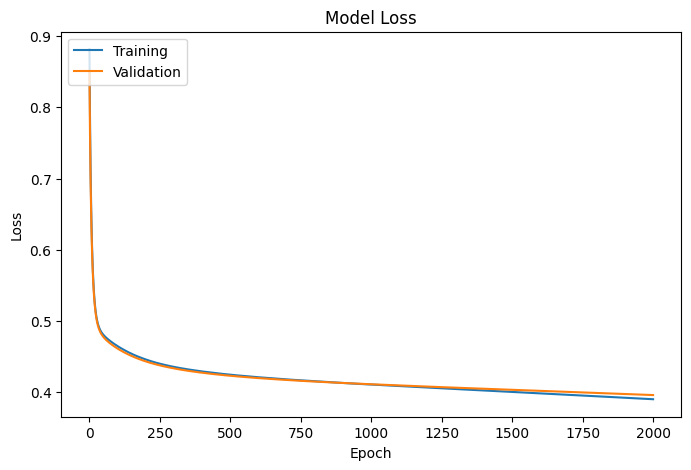

In [ ]:
show_lineplot(data_train = history_0.history['loss'], data_val = history_0.history['val_loss'], feature_name = 'Loss', labels = ['Training', 'Validation'])

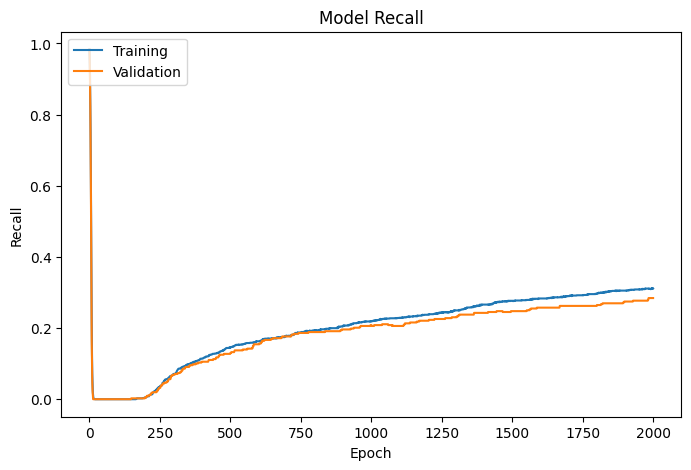

In [ ]:
show_lineplot(data_train = history_0.history['recall'], data_val = history_0.history['val_recall'], feature_name = 'Recall', labels = ['Training', 'Validation'])

In [ ]:
# Display the classification report for training and validation data
show_classification_report(model_name = model_name_0, target_train = y_train, predictors_train = y_train_pred_0, target_val = y_val, predictors_val = y_val_pred_0)

NN with SGD (Training)                              \
                          precision  recall f1-score    support   
0                           0.84628 0.97133  0.90450 4778.00000   
1                           0.73450 0.31015  0.43613 1222.00000   
accuracy                                     0.83667 6000.00000   
macro avg                   0.79039 0.64074  0.67032 6000.00000   
weighted avg                0.82351 0.83667  0.80911 6000.00000   

             NN with SGD (Validation)                              
                            precision  recall f1-score    support  
0                             0.84096 0.96985  0.90082 1592.00000  
1                             0.70732 0.28431  0.40559  408.00000  
accuracy                                       0.83000 2000.00000  
macro avg                     0.77414 0.62708  0.65321 2000.00000  
weighted avg                  0.81370 0.83000  0.79979 2000.00000

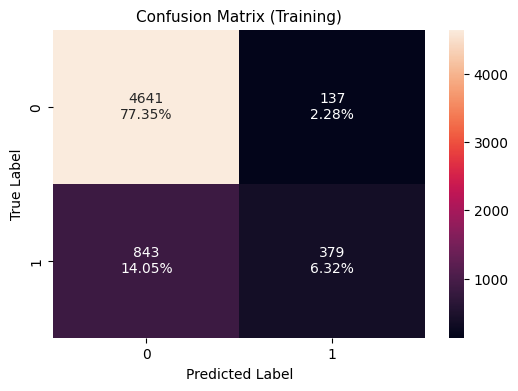

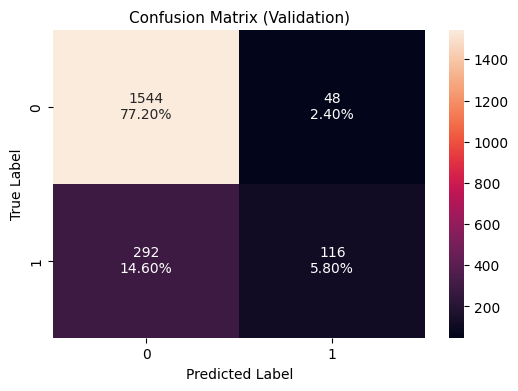

In [ ]:
# Display the confision matrix using training data
show_confusion_matrix(predictors = y_train_pred_0, target = y_train, title = '(Training)')

# Display the confision matrix using validation data
show_confusion_matrix(predictors = y_val_pred_0, target = y_val, title = '(Validation)')

**Observations:**
* Sequential model shows a 31.10% recall score on original training data and a 30.39% recall score on validation data using the following parameters:
  * Optimizer = SGD
  * Metrics = Recall
  * Learning rate = 0.001
  * Loss = binary_crossentropy
  * Number of layers (Dense) = 3
  * Total parameters = 4,993
  * Batch size = 200
  * Epoch = 2,000
* It took the model approximately 3 minutes and 38 seconds to complete the training.
* The line plot for loss and recall shows smooth lines for both original training and validation data.

## Model Performance Improvement

### Neural Network with Adam Optimizer

##### Sequential model with Adam using original data

In [ ]:
# Clear backend session
clear_session()

# Create model with Adam optimizer
model_name_1 = 'NN with Adam'

model_1 = Sequential()
model_1.add(Dense(units = 4, activation = 'relu', input_dim = x_train.shape[1]))
model_1.add(Dense(units = 4, activation = 'relu'))
model_1.add(Dense(units = 1, activation = 'sigmoid'))

model_1.compile(loss = binary_crossentropy, optimizer = Adam(0.001), metrics = [Recall()])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 48        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%%time

# Fit the model
history_1 = model_1.fit(
    x_train, y_train,
    batch_size = 200,
    validation_data = (x_val, y_val),
    epochs = 2000,
    verbose = 1
)

Epoch 1/2000
30/30 [==============================] - 1s 11ms/step - loss: 0.7940 - recall: 0.9501 - val_loss: 0.7613 - val_recall: 0.9118
Epoch 2/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.7346 - recall: 0.8249 - val_loss: 0.7108 - val_recall: 0.7230
Epoch 3/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.6896 - recall: 0.5851 - val_loss: 0.6687 - val_recall: 0.3971
Epoch 4/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.6486 - recall: 0.2774 - val_loss: 0.6254 - val_recall: 0.1422
Epoch 5/2000
30/30 [==============================] - 0s 4ms/step - loss: 0.6087 - recall: 0.0745 - val_loss: 0.5851 - val_recall: 0.0221
Epoch 6/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.5734 - recall: 0.0139 - val_loss: 0.5529 - val_recall: 0.0025
Epoch 7/2000
30/30 [==============================] - 0s 4ms/step - loss: 0.5465 - recall: 0.0025 - val_loss: 0.5293 - val_recall: 0.0025
Epoch 8/2000
30/30 [=============

In [ ]:
# Predicting the training results using 0.5 as the threshold
y_train_pred_1 = (model_1.predict(x_train) > 0.5)

# Predicting the validation results using 0.5 as the threshold
y_val_pred_1 = (model_1.predict(x_val) > 0.5)

# Populate the testing variable using 0.5 as the threshold (will be used later in model comparison)
y_test_pred_1 = (model_1.predict(x_test) > 0.5)

63/63 [==============================] - 0s 1ms/step


##### Observations on Sequential model with Adam using original data

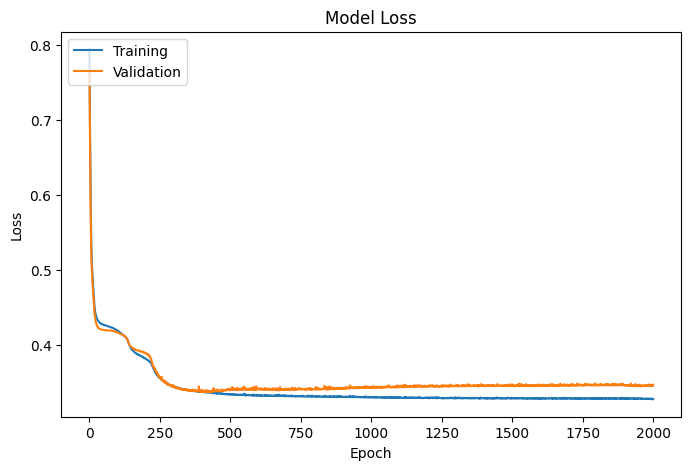

In [ ]:
# Display the training loss and validation loss
show_lineplot(data_train = history_1.history['loss'], data_val = history_1.history['val_loss'], feature_name = 'Loss', labels = ['Training', 'Validation'])

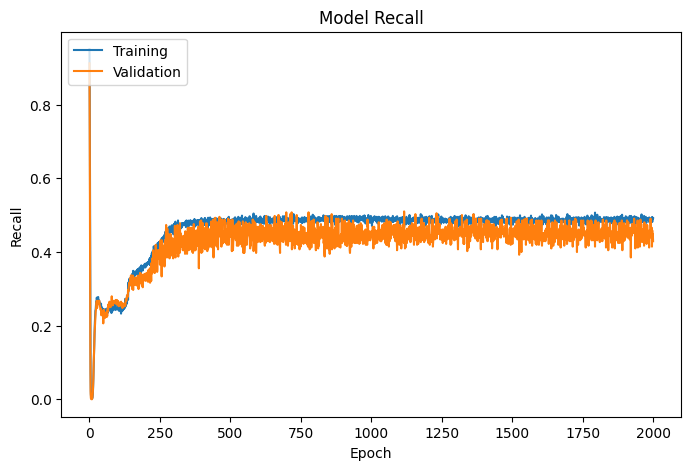

In [ ]:
# Display the training recall and validation recall
show_lineplot(data_train = history_1.history['recall'], data_val = history_1.history['val_recall'], feature_name = 'Recall', labels = ['Training', 'Validation'])

In [ ]:
# Display the classification report for training and validation data
show_classification_report(model_name = model_name_1, target_train = y_train, predictors_train = y_train_pred_1, target_val = y_val, predictors_val = y_val_pred_1)

NN with Adam (Training)                              \
                           precision  recall f1-score    support   
0                            0.87734 0.97007  0.92138 4778.00000   
1                            0.80056 0.46972  0.59206 1222.00000   
accuracy                                      0.86817 6000.00000   
macro avg                    0.83895 0.71990  0.75672 6000.00000   
weighted avg                 0.86170 0.86817  0.85431 6000.00000   

             NN with Adam (Validation)                              
                             precision  recall f1-score    support  
0                              0.86784 0.96106  0.91207 1592.00000  
1                              0.73840 0.42892  0.54264  408.00000  
accuracy                                        0.85250 2000.00000  
macro avg                      0.80312 0.69499  0.72735 2000.00000  
weighted avg                   0.84143 0.85250  0.83671 2000.00000

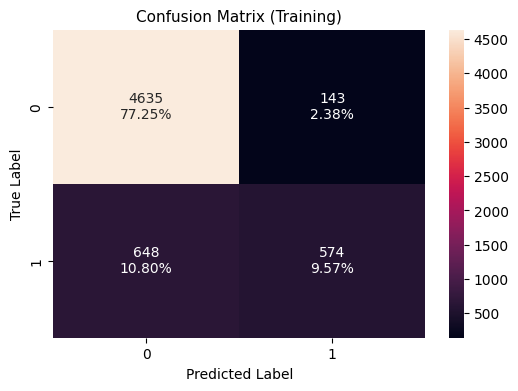

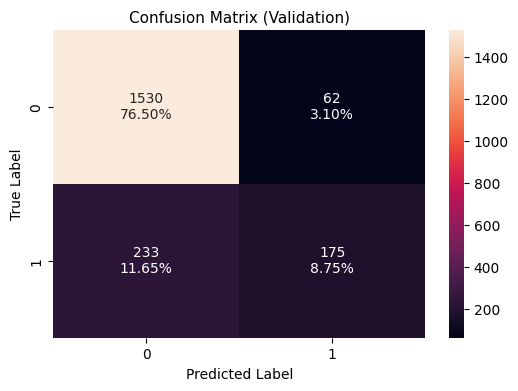

In [ ]:
# Display the confision matrix using training data
show_confusion_matrix(predictors = y_train_pred_1, target = y_train, title = '(Training)')

# Display the confision matrix using validation data
show_confusion_matrix(predictors = y_val_pred_1, target = y_val, title = '(Validation)')

**Observations:**
* Sequential model shows a 49.35% recall score on original training data and a 41.67% recall score on validation data using the following parameters:
  * Optimizer = Adam
  * Metrics = Recall
  * Learning rate = 0.001
  * Loss = binary_crossentropy
  * Number of layers (Dense) = 3
  * Total parameters = 73
  * Batch size = 200
  * Epoch = 2,000
* It took the model approximately 2 minutes and 57 seconds to complete the training.
* The line plot for loss shows smooth lines for both original training and validation data. However, the line plot for recall is showing some noise for the validation data.

### Neural Network with Adam Optimizer and Dropout

##### Sequential model with Adam and Dropout using original data

In [ ]:
# Clear backend session
clear_session()

# Create initial model with Adam optimizer and Dropout
model_name_2 = 'NN with Adam & Dropout'

# Create model with Adam optimizer and Dropout
model_2 = Sequential()
model_2.add(Dense(units = 32, activation = 'relu', input_dim = x_train.shape[1]))
model_2.add(Dropout(rate = 0.5))
model_2.add(Dense(units = 8, activation = 'relu'))
model_2.add(Dense(units = 8, activation = 'relu'))
model_2.add(Dropout(rate = 0.1))
model_2.add(Dense(units = 8, activation = 'relu'))
model_2.add(Dense(units = 1, activation = 'sigmoid'))

model_2.compile(loss = binary_crossentropy, optimizer = Adam(0.001), metrics = [Recall()])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [ ]:
%%time

# Fit the model
history_2 = model_2.fit(
    x_train, y_train,
    batch_size = 200,
    validation_data = (x_val, y_val),
    epochs = 2000,
    verbose = 1
)

Epoch 1/2000
30/30 [==============================] - 2s 12ms/step - loss: 0.6177 - recall: 0.0957 - val_loss: 0.5549 - val_recall: 0.0000e+00
Epoch 2/2000
30/30 [==============================] - 0s 4ms/step - loss: 0.5304 - recall: 0.0000e+00 - val_loss: 0.4886 - val_recall: 0.0000e+00
Epoch 3/2000
30/30 [==============================] - 0s 4ms/step - loss: 0.4998 - recall: 0.0000e+00 - val_loss: 0.4715 - val_recall: 0.0000e+00
Epoch 4/2000
30/30 [==============================] - 0s 4ms/step - loss: 0.4861 - recall: 0.0000e+00 - val_loss: 0.4597 - val_recall: 0.0000e+00
Epoch 5/2000
30/30 [==============================] - 0s 4ms/step - loss: 0.4800 - recall: 0.0000e+00 - val_loss: 0.4502 - val_recall: 0.0000e+00
Epoch 6/2000
30/30 [==============================] - 0s 4ms/step - loss: 0.4704 - recall: 0.0000e+00 - val_loss: 0.4425 - val_recall: 0.0000e+00
Epoch 7/2000
30/30 [==============================] - 0s 4ms/step - loss: 0.4621 - recall: 0.0000e+00 - val_loss: 0.4358 - val_

In [ ]:
# Predicting the training results using 0.5 as the threshold
y_train_pred_2 = (model_2.predict(x_train) > 0.5)

# Predicting the validation results using 0.5 as the threshold
y_val_pred_2 = (model_2.predict(x_val) > 0.5)

# Populate the testing variable using 0.5 as the threshold (will be used later in model comparison)
y_test_pred_2 = (model_2.predict(x_test) > 0.5)

63/63 [==============================] - 0s 1ms/step


##### Observations on Sequential model with Adam and Dropout using original data

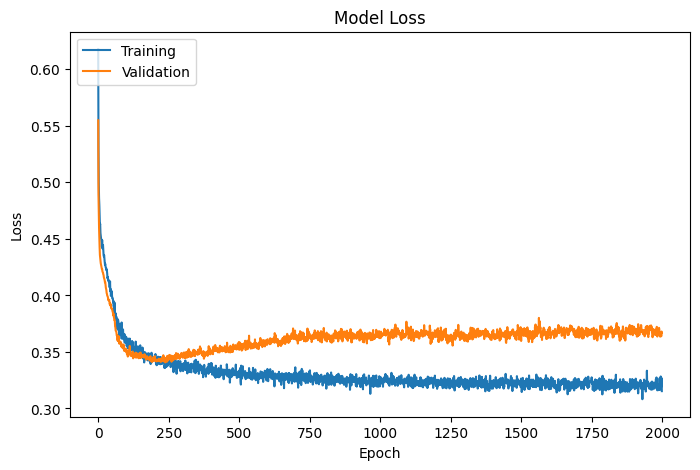

In [ ]:
# Display the training loss and validation loss
show_lineplot(data_train = history_2.history['loss'], data_val = history_2.history['val_loss'], feature_name = 'Loss', labels = ['Training', 'Validation'])

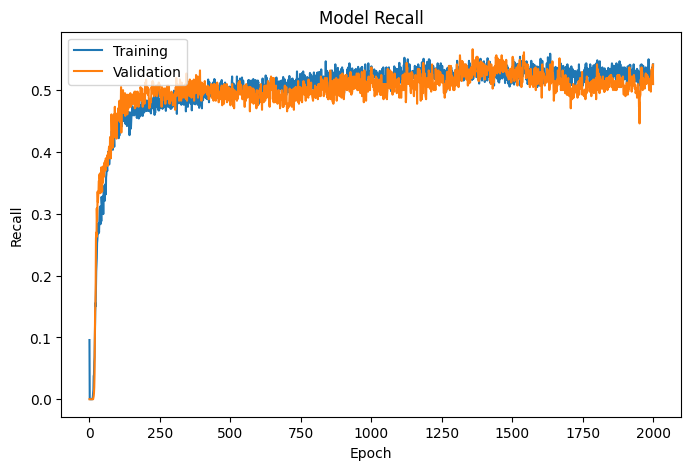

In [ ]:
# Display the training recall and validation recall
show_lineplot(data_train = history_2.history['recall'], data_val = history_2.history['val_recall'], feature_name = 'Recall', labels = ['Training', 'Validation'])

In [ ]:
# Display the classification report for training and validation data
show_classification_report(model_name = model_name_2, target_train = y_train, predictors_train = y_train_pred_2, target_val = y_val, predictors_val = y_val_pred_2)

NN with Adam & Dropout (Training)                              \
                                     precision  recall f1-score    support   
0                                      0.90548 0.95437  0.92928 4778.00000   
1                                      0.77386 0.61047  0.68253 1222.00000   
accuracy                                                0.88433 6000.00000   
macro avg                              0.83967 0.78242  0.80590 6000.00000   
weighted avg                           0.87867 0.88433  0.87903 6000.00000   

             NN with Adam & Dropout (Validation)                              
                                       precision  recall f1-score    support  
0                                        0.88152 0.93467  0.90732 1592.00000  
1                                        0.66667 0.50980  0.57778  408.00000  
accuracy                                                  0.84800 2000.00000  
macro avg                                0.77409 0.72224  0.74255 2000.00000  
weighted avg                             0.83769 0.84800  0.84009 2000.00000

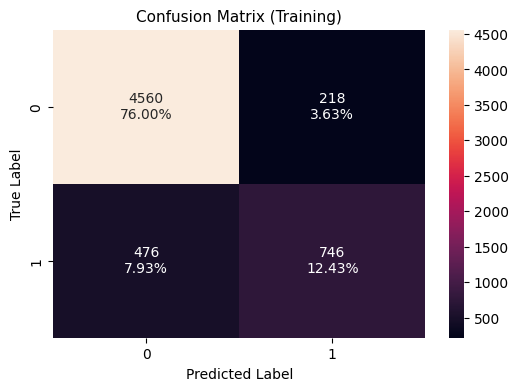

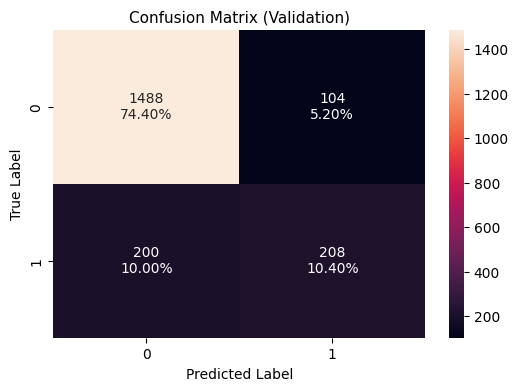

In [ ]:
# Display the confision matrix using training data
show_confusion_matrix(predictors = y_train_pred_2, target = y_train, title = '(Training)')

# Display the confision matrix using validation data
show_confusion_matrix(predictors = y_val_pred_2, target = y_val, title = '(Validation)')

**Observations:**
* Sequential model with shows a 49.35% recall score on original training data and a 41.67% recall score on validation data using the following parameters:
  * Optimizer = Adam
  * Metrics = Recall
  * Learning rate = 0.001
  * Loss = binary_crossentropy
  * Number of layers (Dense and Dropout) = 7
  * Total parameters = 801
  * Batch size = 200
  * Epoch = 2,000
* It took the model approximately 3 minutes and 7 seconds to complete the training.
* The line plot for loss shows smooth lines for both original training and validation data. However, the line plot for recall is showing slight noise for the validation data.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

##### Sequential model with SGD using oversampled data

In [ ]:
# Prepare oversampled data using Synthetic Minority Oversampling Technique (SMOTE)
smo = SMOTE(random_state = 1)
x_train_os, y_train_os = smo.fit_resample(x_train, y_train)

In [ ]:
print('After oversampling, the shape of x_train: {}'.format(x_train_os.shape))
print('After oversampling, the shape of y_train: {}'.format(y_train_os.shape))

In [ ]:
# Clear backend session
clear_session()

# Create model with SGD optimizer using oversampled training data
model_name_3 = 'NN with SMOTE & SGD'

model_3 = Sequential()
model_3.add(Dense(units = 8, activation = 'relu', input_dim = x_train_os.shape[1]))
model_3.add(Dense(units = 16, activation = 'relu'))
model_3.add(Dense(units = 8, activation = 'relu'))
model_3.add(Dense(units = 1, activation = 'sigmoid'))

model_3.compile(loss = binary_crossentropy, optimizer = SGD(0.001), metrics = [Recall()])

model_3.summary()

In [ ]:
%%time

# Fit the model
history_3 = model_3.fit(
    x_train_os, y_train_os,
    batch_size = 200,
    validation_data = (x_val, y_val),
    epochs = 2000,
    verbose = 1
)

In [ ]:
# Predicting the oversampled training results using 0.5 as the threshold
y_train_pred_3 = (model_3.predict(x_train_os) > 0.5)

# Predicting the validation results using 0.5 as the threshold
y_val_pred_3 = (model_3.predict(x_val) > 0.5)

# Populate the testing variable using 0.5 as the threshold (will be used later in model comparison)
y_test_pred_3 = (model_3.predict(x_test) > 0.5)

##### Observations on Sequential model with SGD using oversampled data

In [ ]:
# Display the training loss and validation loss
show_lineplot(data_train = history_3.history['loss'], data_val = history_3.history['val_loss'], feature_name = 'Loss', labels = ['Training', 'Validation'])

In [ ]:
# Display the training recall and validation recall
show_lineplot(data_train = history_3.history['recall'], data_val = history_3.history['val_recall'], feature_name = 'Recall', labels = ['Training', 'Validation'])

In [ ]:
# Display the classification report for oversampled training and validation data
show_classification_report(model_name = model_name_3, target_train = y_train_os, predictors_train = y_train_pred_3, target_val = y_val, predictors_val = y_val_pred_3)

In [ ]:
# Display the confision matrix using oversampled training data
show_confusion_matrix(predictors = y_train_pred_3, target = y_train_os, title = '(Training)')

# Display the confision matrix using validation data
show_confusion_matrix(predictors = y_val_pred_3, target = y_val, title = '(Validation)')

**Observations:**
* Sequential model shows a 73.06% recall score on oversampled training data and a 67.40% recall score on validation data using the following parameters:
  * Optimizer = SGD
  * Metrics = Recall
  * Learning rate = 0.001
  * Loss = binary_crossentropy
  * Number of layers (Dense and Dropout) = 4
  * Total parameters = 385
  * Batch size = 200
  * Epoch = 2,000
* It took the model approximately 3 minutes and 50 seconds to complete the training.
* The line plot for loss and recall shows smooth lines for both oversampled training and validation data.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

##### Sequential model with Adam using oversampled data

In [ ]:
# Clear backend session
clear_session()

# Create model with Adam optimizer using oversampled training data
model_name_4 = 'NN with SMOTE & Adam'

model_4 = Sequential()
model_4.add(Dense(units = 4, activation = 'relu', input_dim = x_train_os.shape[1]))
model_4.add(Dense(units = 4, activation = 'relu'))
model_4.add(Dense(units = 4, activation = 'relu'))
model_4.add(Dense(units = 1, activation = 'sigmoid'))

model_4.compile(loss = binary_crossentropy, optimizer = Adam(0.001), metrics = [Recall()])

model_4.summary()

In [ ]:
%%time

# Fit the model
history_4 = model_4.fit(
    x_train_os, y_train_os,
    batch_size = 200,
    validation_data = (x_val, y_val),
    epochs = 2000,
    verbose = 1
)

In [ ]:
# Predicting the oversampled training results using 0.5 as the threshold
y_train_pred_4 = (model_4.predict(x_train_os) > 0.5)

# Predicting the validation results using 0.5 as the threshold
y_val_pred_4 = (model_4.predict(x_val) > 0.5)

# Populate the testing variable using 0.5 as the threshold (will be used later in model comparison)
y_test_pred_4 = (model_4.predict(x_test) > 0.5)

##### Observations on Sequential model with Adam using oversampled data

In [ ]:
# Display the training loss and validation loss
show_lineplot(data_train = history_4.history['loss'], data_val = history_4.history['val_loss'], feature_name = 'Loss', labels = ['Training', 'Validation'])

In [ ]:
# Display the training recall and validation recall
show_lineplot(data_train = history_4.history['recall'], data_val = history_4.history['val_recall'], feature_name = 'Recall', labels = ['Training', 'Validation'])

In [ ]:
# Display the classification report for oversampled training and validation data
show_classification_report(model_name = model_name_4, target_train = y_train_os, predictors_train = y_train_pred_4, target_val = y_val, predictors_val = y_val_pred_4)

In [ ]:
# Display the confision matrix using oversampled training data
show_confusion_matrix(predictors = y_train_pred_4, target = y_train_os, title = '(Training)')

# Display the confision matrix using validation data
show_confusion_matrix(predictors = y_val_pred_4, target = y_val, title = '(Validation)')

**Observations:**
* Sequential model shows a 78.80% recall score on oversampled training data and a 71.57% recall score on validation data using the following parameters:
  * Optimizer = Adam
  * Metrics = Recall
  * Learning rate = 0.001
  * Loss = binary_crossentropy
  * Number of layers (Dense) = 4
  * Total parameters = 93
  * Batch size = 200
  * Epoch = 2,000
* It took the model approximately 3 minutes and 46 seconds to complete the training.
* The line plot for loss and recall shows smooth lines for oversampled training data. However, the line plot for loss and recall is showing some noise for the validation data.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

##### Sequential model with Adam and Dropout using oversampled data

In [ ]:
# Clear backend session
clear_session()

# Create model with Adam optimizer and Dropout using oversampled training data
model_name_5 = 'NN with SMOTE, Adam & Dropout'

model_5 = Sequential()
model_5.add(Dense(units = 8, activation = 'relu', input_dim = x_train_os.shape[1]))
model_5.add(Dropout(rate = 0.4))
model_5.add(Dense(units = 8, activation = 'relu'))
model_5.add(Dropout(rate = 0.1))
model_5.add(Dense(units = 8, activation = 'relu'))
model_5.add(Dense(units = 1, activation = 'sigmoid'))

model_5.compile(loss = binary_crossentropy, optimizer = Adam(0.001), metrics = [Recall()])

model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable pa

In [ ]:
%%time

# Fit the model
history_5 = model_5.fit(
    x_train_os, y_train_os,
    batch_size = 200,
    validation_data = (x_val, y_val),
    epochs = 2000,
    verbose = 1
)

Epoch 1/2000
48/48 [==============================] - 1s 7ms/step - loss: 0.7051 - recall: 0.7216 - val_loss: 0.6950 - val_recall: 0.7010
Epoch 2/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.6786 - recall: 0.5136 - val_loss: 0.6518 - val_recall: 0.5294
Epoch 3/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.6687 - recall: 0.4887 - val_loss: 0.6386 - val_recall: 0.5907
Epoch 4/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.6592 - recall: 0.5216 - val_loss: 0.6292 - val_recall: 0.6422
Epoch 5/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.6425 - recall: 0.5837 - val_loss: 0.6073 - val_recall: 0.6593
Epoch 6/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.6313 - recall: 0.6488 - val_loss: 0.5868 - val_recall: 0.6642
Epoch 7/2000
48/48 [==============================] - 0s 3ms/step - loss: 0.6167 - recall: 0.6628 - val_loss: 0.5826 - val_recall: 0.6789
Epoch 8/2000
48/48 [==============

In [ ]:
# Predicting the oversampled training results using 0.5 as the threshold
y_train_pred_5 = (model_5.predict(x_train_os) > 0.5)

# Predicting the validation results using 0.5 as the threshold
y_val_pred_5 = (model_5.predict(x_val) > 0.5)

# Populate the testing variable using 0.5 as the threshold (will be used later in model comparison)
y_test_pred_5 = (model_5.predict(x_test) > 0.5)

63/63 [==============================] - 0s 1ms/step


##### Observations on Sequential model with Adam and Dropout using oversampled data

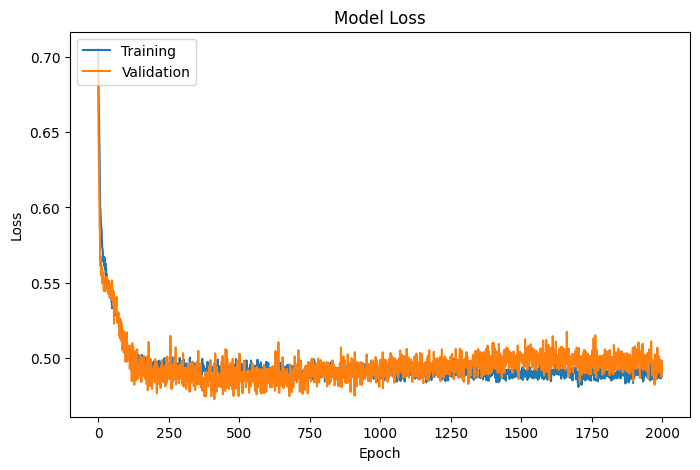

In [ ]:
# Display the training loss and validation loss
show_lineplot(data_train = history_5.history['loss'], data_val = history_5.history['val_loss'], feature_name = 'Loss', labels = ['Training', 'Validation'])

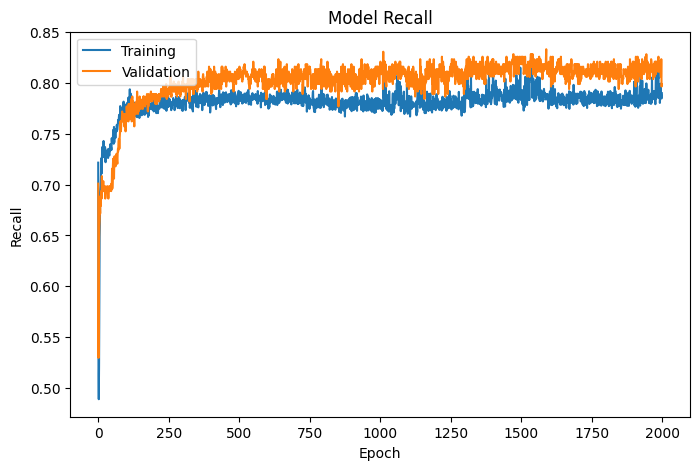

In [ ]:
# Display the training recall and validation recall
show_lineplot(data_train = history_5.history['recall'], data_val = history_5.history['val_recall'], feature_name = 'Recall', labels = ['Training', 'Validation'])

In [ ]:
# Display the classification report for oversampled training and validation data
show_classification_report(model_name = model_name_5, target_train = y_train_os, predictors_train = y_train_pred_5, target_val = y_val, predictors_val = y_val_pred_5)

NN with SMOTE, Adam & Dropout (Training)                   \
                                            precision  recall f1-score   
0                                             0.82290 0.72645  0.77168   
1                                             0.75515 0.84366  0.79696   
accuracy                                                       0.78506   
macro avg                                     0.78903 0.78506  0.78432   
weighted avg                                  0.78903 0.78506  0.78432   

                        NN with SMOTE, Adam & Dropout (Validation)          \
                support                                  precision  recall   
0            4778.00000                                    0.93322 0.71985   
1            4778.00000                                    0.42228 0.79902   
accuracy     9556.00000                                                      
macro avg    9556.00000                                    0.67775 0.75943   
weighted avg 9556.00000                                    0.82899 0.73600   

                                  
             f1-score    support  
0             0.81277 1592.00000  
1             0.55254  408.00000  
accuracy      0.73600 2000.00000  
macro avg     0.68265 2000.00000  
weighted avg  0.75968 2000.00000

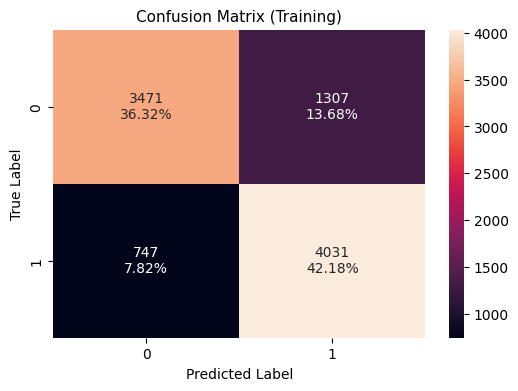

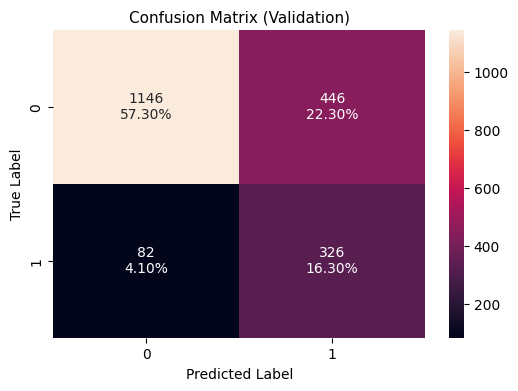

In [ ]:
# Display the confision matrix using oversampled training data
show_confusion_matrix(predictors = y_train_pred_5, target = y_train_os, title = '(Training)')

# Display the confision matrix using validation data
show_confusion_matrix(predictors = y_val_pred_5, target = y_val, title = '(Validation)')

**Observations:**
* Sequential model shows a 84.37% recall score on oversampled training data and a 79.90% recall score on validation data using the following parameters:
  * Optimizer = Adam
  * Metrics = Recall
  * Learning rate = 0.001
  * Loss = binary_crossentropy
  * Number of layers (Dense and Dropout) = 6
  * Total parameters = 249
  * Batch size = 200
  * Epoch = 2,000
* It took the model approximately 4 minutes and 36 seconds to complete the training.
* The line plot for loss and recall shows slight noise for both oversampled training and validation data.

## Model Performance Comparison and Final Model Selection

### Comparison of Model Performance

##### Comparison of model performance on validation sets

In [ ]:
# Display the comparison of training recall and validation recall
metric_train_val_list = [
  (model_name_0, y_train, y_train_pred_0, y_val, y_val_pred_0, None, None),
  (model_name_1, y_train, y_train_pred_1, y_val, y_val_pred_1, None, None),
  (model_name_2, y_train, y_train_pred_2, y_val, y_val_pred_2, None, None),
  (model_name_3, y_train_os, y_train_pred_3, y_val, y_val_pred_3, None, None),
  (model_name_4, y_train_os, y_train_pred_4, y_val, y_val_pred_4, None, None),
  (model_name_5, y_train_os, y_train_pred_5, y_val, y_val_pred_5, None, None)
]

show_model_recall_comp(metric_train_val_list)

NN with SGD  NN with Adam  \
Recall (Training)                       0.31097       0.49345   
Recall (Validation)                     0.30392       0.41667   
Difference (Training - Validation)     -0.00704      -0.07679   

                                    NN with Adam & Dropout  \
Recall (Training)                                  0.59411   
Recall (Validation)                                0.50245   
Difference (Training - Validation)                -0.09166   

                                    NN with SMOTE & SGD  NN with SMOTE & Adam  \
Recall (Training)                               0.73064               0.78799   
Recall (Validation)                             0.67402               0.71569   
Difference (Training - Validation)             -0.05662              -0.07230   

                                    NN with SMOTE, Adam & Dropout  
Recall (Training)                                         0.84366  
Recall (Validation)                                       0.79902  
Difference (Training - Validation)                       -0.04464

**Observations:**
* Building the Sequential model on both original and oversampled training data, it shows that the following parameters from model **NN with SMOTE, Adam & Dropout** is producing the best recall score on validation data (with 79.90% recall score, and only 4.46% lower than the training recall score):
  * Optimizer = Adam
  * Metrics = Recall
  * Learning rate = 0.001
  * Loss = binary_crossentropy
  * Number of layers (Dense and Dropout) = 6
  * Total parameters = 249
  * Batch size = 200
  * Epoch = 2,000

##### Comparison of model performance on testing sets

In [ ]:
# Display the comparison of training recall and testing recall
metric_train_test_list = [
  (model_name_0, y_train, y_train_pred_0, None, None, y_test, y_test_pred_0),
  (model_name_1, y_train, y_train_pred_1, None, None, y_test, y_test_pred_1),
  (model_name_2, y_train, y_train_pred_2, None, None, y_test, y_test_pred_2),
  (model_name_3, y_train_os, y_train_pred_3, None, None, y_test, y_test_pred_3),
  (model_name_4, y_train_os, y_train_pred_4, None, None, y_test, y_test_pred_4),
  (model_name_5, y_train_os, y_train_pred_5, None, None, y_test, y_test_pred_5)
]

show_model_recall_comp(metric_train_test_list)

NN with SGD  NN with Adam  \
Recall (Training)                    0.31097       0.49345   
Recall (Testing)                     0.31204       0.45455   
Difference (Training - Testing)      0.00107      -0.03891   

                                 NN with Adam & Dropout  NN with SMOTE & SGD  \
Recall (Training)                               0.59411              0.73064   
Recall (Testing)                                0.51351              0.65602   
Difference (Training - Testing)                -0.08059             -0.07462   

                                 NN with SMOTE & Adam  \
Recall (Training)                             0.78799   
Recall (Testing)                              0.70516   
Difference (Training - Testing)              -0.08283   

                                 NN with SMOTE, Adam & Dropout  
Recall (Training)                                      0.84366  
Recall (Testing)                                       0.78624  
Difference (Training - Testing)                       -0.05742

In [ ]:
# Display the classification report for training and testing data
show_classification_report(model_name = model_name_5, target_train = y_train_os, predictors_train = y_train_pred_5, target_test = y_test, predictors_test = y_test_pred_5)

NN with SMOTE, Adam & Dropout (Training)                   \
                                            precision  recall f1-score   
0                                             0.82290 0.72645  0.77168   
1                                             0.75515 0.84366  0.79696   
accuracy                                                       0.78506   
macro avg                                     0.78903 0.78506  0.78432   
weighted avg                                  0.78903 0.78506  0.78432   

                        NN with SMOTE, Adam & Dropout (Testing)          \
                support                               precision  recall   
0            4778.00000                                 0.92840 0.70810   
1            4778.00000                                 0.40764 0.78624   
accuracy     9556.00000                                                   
macro avg    9556.00000                                 0.66802 0.74717   
weighted avg 9556.00000                                 0.82242 0.72400   

                                  
             f1-score    support  
0             0.80342 1593.00000  
1             0.53691  407.00000  
accuracy      0.72400 2000.00000  
macro avg     0.67017 2000.00000  
weighted avg  0.74918 2000.00000

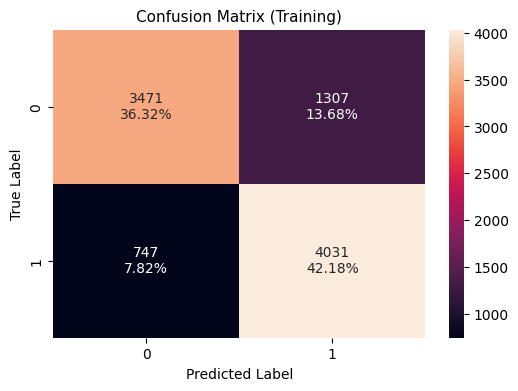

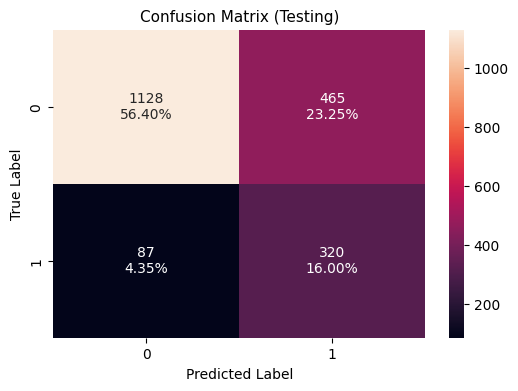

In [ ]:
# Display the confision matrix using oversampled training data
show_confusion_matrix(predictors = y_train_pred_5, target = y_train_os, title = '(Training)')

# Display the confision matrix using testing data
show_confusion_matrix(predictors = y_test_pred_5, target = y_test, title = '(Testing)')

**Observations:**
* By comparing the performance of all the Sequential models on testing data, it still shows that the following parameters from model **NN with SMOTE, Adam & Dropout** is producing the best recall score on testing data (with 78.62% recall score, and only 5.74% lower than the training recall score):
  * Optimizer = Adam
  * Metrics = Recall
  * Learning rate = 0.001
  * Loss = binary_crossentropy
  * Number of layers (Dense and Dropout) = 6
  * Total parameters = 249
  * Batch size = 200
  * Epoch = 2,000

### Key Observations on Model Comparison

* The model **NN with SMOTE, Adam & Dropout** shows the highest recall scores in training, validation and testing data:
  * Training (oversampled): 84.37%
  * Validation: 79.90%
  * Testing: 78.62%
* We will choose the model **NN with SMOTE, Adam & Dropout** as the best model since it is showing the highest recall scores. The model was tuned using the following parameters:
  * Optimizer = Adam
  * Metrics = Recall
  * Learning rate = 0.001
  * Loss = binary_crossentropy
  * Number of layers (Dense and Dropout) = 6
  * Total parameters = 249
  * Batch size = 200
  * Epoch = 2,000


## Actionable Insights and Business Recommendations

### Conclusions:

* The model **NN with SMOTE, Adam & Dropout** provides a recall score of 84.37% for the training set, 79.90% for the validation set and 78.62% for the testing set.
* The  model shows that it can approximately identify 78.62% if a customer going to churn from the bank.
* It shows (via EDA) that the following are the customer features that affect customer churn:
  * Geography
  * Gender
  * IsActiveMember
  * CreditScore
  * Age
  * Balance
  * NumOfProducts

### Recommendations:

* Offer more benefits to attract new customers or to encourage existing customers to use their accounts more often, for example:
  * Higher cash back.
  * Lower or 0% APR (Annual Percentage Rate).
  * Higher credit limit for frequent credit card users.
  * Cash advance (i.e. cash withdrawal from credit card account).
* Request regular feedback from customers to improve the quality of service.
* Prioritize offering more benefits to customers that are closely falling to these conditions/ features:
  * CreditScore: Majority of customers who have churned do have slightly lower credit score (mean value close to 645).
  * Age: Majority of customers who have churned do have significantly older age (mean value close to 44 years old).
  * Balance: Majority of customers who have churned do have significantly higher balance (mean value close to 91,108).
  * NumOfProducts: Majority of customers who have churned do have slightly lower number of products (mean value close to 1.4).
  * Geography: Majority of the customers who have churned are located in this order: Germany (with 32.44%), Spain (with 16.67%), France (with 16.15%).
  * Gender: Mojority of customers who have churned are female gender (with 25.07%) compared to customers with male gender (with 16.46%).
  * IsActiveMember: ajority of the customers who have churned are not active members (with 26.85%) compared to customers who are active members (with 14.27%).
* The bank should provide more data to obtain more reliable results.

***